# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Это показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Красных комментариев, которые бы не позволяли мне принять твой проект в его нынешнем состоянии - нет. 

ПРОЕКТ ПРИНЯТ!

Подводя итог: отличная работа, молодец! Желаю тебе успехов в учёбе, желаю, чтобы проекты сдавались или сразу, или после первой итерации! Удачи!

Если же после факта принятия проекта у тебя возникнут дополнительные вопросы – я никуда не пропал. Мой адрес эл/почты: anepomnjashiy@gmail.com, имя в Пачке: anepomnjashiy, имя в Телеграмме: https://t.me/aleks_nep

p.s. я тебе на твой адрес эл/почты сейчас вышлю некоторые материалы из своей электронной библиотеки - надеюсь они будут тебе полезными в учёбе.</div>

Приветствую Яков! 

Меня зовут Александр Непомнящий и я буду проверять твой проект. Предлагаю общаться на «ты» :))) Но, если это не удобно - мы вполне можем перейти на вы".

Вкратце обо мне: я работаю в сфере информационных технологий, аналитика (анализ) данных - это и мой рабочий функционал и личная, интересная мне область для саморазвития. Используемый стек: python, pandas, графические библиотеки matplotlib/seaborn/plotly. Сфера применения: маркетинговая аналитика в медицинской клинике. Если вдруг есть вопрос – что делает аналитик в коммерческой медицине – то вот короткий ответ. Самый главный вопрос, на который мы хотим получить ответ (и который в дальнейшем приведёт к перераспределению рекламного бюджета, плюс напрямую повлияет на разработку и предложению рынку новых лечебных программ) - это КТО ОН, НАШ КЛИЕНТ? Фактически это задача (на нашем внутреннем языке формулируется как построение и анализ «ПОРТРЕТА КЛИЕНТА»). Визуализируем и пытаемся придать смысл половозрастным данным наших клиентов, кто из какого региона и в какие времена года к нам приезжает. Учитываем количество приездов. Учитываем на какую программу этот конкретный клиент приехал в первый раз и как в дальнейшем меняются его предпочтения. Пытаемся построить модель оттока и спрогнозировать, когда клиент уйдёт в отток. Смотрим цифры (суммы трат клиентов на отдельных группах медицинских программ). Анализируем медицинские услуги, которые входят в путёвку, а также что, в каких количествах и на какую сумму клиент покупает дополнительно. Очень вкратце как-то так.

Теперь к сути: основная цель моей проверки - пройти по шагам, по логике твоего решения и обсудить те моменты, которые можно изменить, улучшить, довести до идеала. Такой формат работы двух программистов (аналитиков) ты или уже встречал(а), или встретишь на своей новой работе. Кто-то такой процесс называет "код-ревью", ну а как по мне, так это обмен опытом двух коллег, когда каждый из нас становиться лучше в процессе дискуссии.

Свои мысли, советы, комментарии и вопросы я буду оставлять в текстовых ячейках (markdown) ПОД твоим кодом. 
Для твоего удобства все эти заметки будут "цветными", как на примерах ниже:

"Зелеными" комментариями я буду отмечать твой элегантный ("красивый") код и/или удачные решения, на которые ты можешь смело опираться в будущих проектах.
<div class="alert alert-success">
<b>Отлично! 👍</b>

Отличная находка, элегантный код ...</div>

"Жёлтые" комментарии - это мои размышления, предложения, что-то, что на следующей итерации можно сделать по-другому. Твоя реакция на "жёлтые" комментарий необходима и подразумевает или правки, или реакцию или аргументированное согласие/не согласие. Я искренне верю, что наш двусторонний диалог под "желтым" комментарием - это то, от чего твой проект только выиграет. <div class="alert alert-warning">
<b>Комментарий 👉</b>

Здесь я бы предложил использовать .... Мои аргументы в пользу этого ...</div>

"Красные" комментарий будут появляться, когда что-то пойдёт не так: например, код будет выдавать ошибку. Или, когда в проекте не будет ответов на основные вопросы, ради которых весь анализ и выполнялся. "Красные" комментарии необходимо будет исправить, прежде чем я смогу принять проект.
<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

В этой ячейке код работает не так как задумано ...</div>

Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Это поможет мне оперативно выполнить повторную проверку твоего проекта.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом, лучше всего в новой ячейке, сразу под моим комментарием. Если для своих комментариев ты будешь использовать какой-то заметный цвет, то мне будет легче отследить твои изменения, например так:
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Текст твоего комментария ...</font>
</div>

**Распространенные типичные недочёты в проектах студентов:**

<div class="alert alert-danger" ❌>
Неработоспособный код. Проверь проект на работоспособность перед отправкой на проверку. Это важный навык, который тебе пригодится как на собеседовании, при выполнении тестового задания, так и перед совещанием у руководства компании.</div>
<div class="alert alert-danger" ❌>
Проект не структурирован. В проекте должна быть структура, т.е. названия разделов и подразделов должны быть записаны в ячейках Markdown.</div>
<div class="alert alert-warning" 👉 >
Отсутствие описания, целей проекта, его задач, выводов. В описании должны быть озвучены поставленные задачи, содержание датасета, промежуточные и финальные выводы. Как правило, заказчик читает только финальный вывод, поэтому важно добавить информацию о проведенном исследовании, применить форматирование текста, в общем, сделать красиво, чтобы было понятно, что проведено настоящее исследование и выводу можно верить.</div>  
<div class="alert alert-warning" 👉 >
"Длинный код". Код и и комментарии, которые прячутся за правым концом ячейки нужно переносить на новую строку. Твои будущие коллеги не оценят необходимость постоянного скроллинга. Согласно PEP8: https://www.python.org/dev/peps/pep-0008/ длина строки не должна превышать 79 символов.</div>
<div class="alert alert-warning" 👉 >
Твои коллеги ценят и твое и своё время, поэтому "подсвечивай" свои комментарии в ячейках Markdown. Подробнее про синтаксис Markdown, с примерами, можно почитать здесь: https://paulradzkov.com/2014/markdown_cheatsheet/?
</div>

# "В один клик". Персональные предложения для клиентов

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

## Задача 

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Детализация задачи

<ol>
    <li>Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».</li>
    <li>Нужно собрать данные по клиентам по следующим группам:
        <ul>
            <li>Признаки, которые описывают коммуникацию сотрудников компании с клиентом.</li>
            <li>Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.</li>
            <li>Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.</li>
            <li>Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.</li>
            <li>Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.</li>
            <img src='https://pictures.s3.yandex.net/resources/image_1695485033.png' width="600" height="600">
            </ul>
    </li>
    <li>Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.</li>
    <li>В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.</li>
    <li>Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.</li>
</ol>

### Описание данных
Данные для работы находятся в нескольких таблицах.

**market_file.csv** - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Покупательская активность* — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».<br>
*Тип сервиса* — уровень сервиса, например «премиум» и «стандарт».<br>
*Разрешить сообщать* — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.<br>
*Маркет_актив_6_мес* — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.<br>
*Маркет_актив_тек_мес* — количество маркетинговых коммуникаций в текущем месяце.<br>
*Длительность* — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.<br>
*Акционные_покупки* — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.<br>
*Популярная_категория* — самая популярная категория товаров у покупателя за последние 6 месяцев.<br>
*Средний_просмотр_категорий_за_визит* — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.<br>
*Неоплаченные_продукты_штук_квартал* — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
*Ошибка_сервиса* — число сбоев, которые коснулись покупателя во время посещения сайта.<br>
*Страниц_за_визит* — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>

**market_money.csv** - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Период* — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.<br>
*Выручка* — сумма выручки за период.<br>

**market_time.csv** - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Период* — название периода, во время которого зафиксировано общее время.<br>
минут — значение времени, проведённого на сайте, в минутах.<br>

**money.csv** - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Прибыль* — значение прибыли.<br>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Ты делаешь хорошую работу уже в начале нашего проекта по Data Science. Твой подход к описанию всего проекта уже с самого начала – это плюс. Ты ясно и четко формулируешь цель нашего исследования, что дает нам прочную основу для дальнейших этапов.

Твое описание того, как ты будешь двигаться дальше, также впечатляет. Твои действия по обработке и структурированию данных в начальных этапах – это правильный шаг. Также отмечу, что твое умение систематизировать данные с самого начала проекта позволяет нам лучше понимать характер данных и уже сейчас делать некоторые предварительные наметки. Такой подход в начале аналитического/Дата Сайенс проекта говорит о твоей компетентности и ставит нас на "правильную дорогу" для успешного исследования.
</div>

In [1]:
!pip install -q imblearn
!pip install -q phik
!pip install -Uq scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q optuna.integration

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Полезный ключ **-q** (он "подавит" служебные сообщения об установке, которых может быть достаточно много - вплоть до нескольких экранов прокрутки).
</div>

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler, 
    OneHotEncoder, 
    OrdinalEncoder)
from sklearn.impute import SimpleImputer
from itertools import product
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

sns.set(rc={'figure.figsize':(20, 10)})

RANDOM_STATE = 42
TEST_SIZE = 0.25

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, все импорты собраны в начале "тетрадки"!

---
В Python есть своя философия. Именно отсюда берутся определенные правила и стандарты. В пайтон такое соглашение назвали PEP8.

Соответствие PEP8 позволяет видеть основную структуру вашего кода другим разработчикам. Не нужно привыкать к другому оформлению кода. Если вы привыкли как-то оформлять код, а увидели что-то совершенно другое, то вы поймете. 

Официальная документация: https://peps.python.org/pep-0008/ 

Основные моменты и рекомендации:

- Используй пробелы, разрешается использование табов, но смешивание запрещено. Отступ соответствует 4 пробелам. Хорошие редакторы кода автоматически заменяют табы на пробелы.

- Вокруг операторов +, -, =, *, /, ** должны быть пробелы. 

- Строка не должна превышать 79 символов

- Ну и наконец про импорты: импорты можно делать только по одному на строку! При этом из одного модуля можно доставать несколько нужных объектов. Порядок тоже важен:

- импорты из стандартной библиотеки
- импорты из сторонних библиотек
- импорты пользовательских модулей текущего проекта (например если выносишь функции в отдельный модуль)

И нежелательно их перемешивать с константами и переменными.

p.s. состав стандартных библиотек Python здесь: [The Python Standard Library](https://docs.python.org/3/library/)
</div>

## Загрузка данных

In [3]:
try:
    market = pd.read_csv('market_file.csv')
    market_money = pd.read_csv('market_money.csv')
    market_time = pd.read_csv('market_time.csv')
    money = pd.read_csv('money.csv', sep=';', decimal=',')
except FileNotFoundError:
    try:
        market = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
        market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
        market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
        money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')
    except Exception as e:
        print("Ошибка при загрузке данных с внешнего источника:", e)
        raise


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично. Импортировали требуемые для анализа библиотеки и загрузили данные. Сейчас посмотрим на их состояние и если всё ОК, сможем приступать к построению моделей....

p.s. при установке дополнительных библиотек (через ! pip install ...) можно использовать полезный ключ **-q** (он "подавит" служебные сообщения об установке, которых может быть достаточно много - вплоть до нескольких экранов прокрутки)

p.p.s. При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.
</div>

In [4]:
def tidy_dataframe(df):
    """
    Универсальная функция для приведения датафрейма к единому стилю.

    • В названиях столбцов заменяет пробелы на «_» и переводит всё в нижний регистр.  
    • Во всех строковых столбцах делает то же самое со значениями.  
    • Отображает структуру, первые строки и число полных дублей.  
    • Возвращает очищенный датафрейм.
    """
    # --- стандартизация имён столбцов
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]

    # --- стандартизация строковых значений
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(' ', '_').str.lower()

    # --- информационный вывод
    display(df.info())
    print()
    display(df.head())
    print(f'Полных дублей: {df.duplicated().sum()}\n')

    return df

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец, что названия столбцов выше приведены к "змеинному регистру"! 
    
p.s и приведение названий столбцов к нижнему регистру и изменение типов данных столбцов - это отдельные шаги в общем пайплайне исследовательского анализа данных (EDA). Ниже ссылки, описывающие взгляд на процесс EDA "сверху":
    
1. https://waksoft.susu.ru/2021/07/23/issledovatelskij-analiz-dannyh-v-python-rukovodstvo-dlya-novichkov-na-2021-god/
    
2. https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

3. https://www.datacareer.de/blog/exploratory-data-analysis-in-python/   
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Хочу отметить, что в общем случае, "в жизни", даже если **df.duplicated().sum() == 0** - это может совсем не означать, что в данных нет дубликатов. 
    
---
В реальных рабочих датасетах скорее всего не будет полных дубликатов, но вот неявные наверняка будут встречаться, соответственно с ними надо будет уметь работать. Для поиска неявных дублей обычно используют параметр **subset** у функции duplicated(). Правда здесь, в нашем проекте, надо поразмыслить над тем какие комбинации столбцов могут говорить о реальных дублях в данных.</div>

In [5]:
for df in [market, market_money, market_time, money]:
    df = tidy_dataframe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Полных дублей: 0



<div class="alert alert-warning">
<b>Комментарий 👉</b>

В наших данных пропусков НЕТ, НО ЕСЛИ БЫ БЫЛИ .... я стараюсь дать подробный коммент-видение на тему обработки пропусков данных (так как понимаю, что несмотря на кажущуюся простоту - не очень просто понять чем ("заглушкой"? / медианой? / средним? / по комбинации столбцов?) заполнять? а может удалять?      

---    
По результатам проверки 5+ тысяч проектов за 3 года у меня родилось небольшое эссе на тему "удаления vs. спасения" данных, как раз на основе тех ситуаций и вопросов, которые мне коллеги задавали, которые мы обсуждали, уточняли и исправляли ... 

<br>
<br>
<details>
<summary style="color: blue; font-size: 18px; font-weight: bold;">▶ <u>Подробнее ...</u></summary>

Желание уменьшить количество пропусков в данных (если такое желание конечно возникает ... но в рабочих проектах, "в жизни" оно как правило возникает) - можно только приветствовать. Приветствовать по 3-м минимум причинам:

1. это тренировка
    
2. это попытка сохранить данные ("данных много не бывает")
    
3. самое главное на мой взгляд - развитие аналитического мышления, желания "проникать" в секреты, которые скрывают данные. Когда вначале рождается гипотеза, потом эта гипотеза проверяется на данных (может ли такое быть? подтверждается?) и в финале уже гипотеза облекается в код.

Однако заполнение пропусков в данных не такая простая задача, как кажется ... простого ответа на вопросы: заполнять? удалить? чем заполнять? подходящего под все сценарии, нет ни в одной умной книжке ...

Самый идеальный случай - когда у тебя под рукой есть эксперт в предметной области. Если такой есть - советуйся с ним. Как правило это человек из бизнеса, который знает суть бизнес-процесса и вот именно он даст тебе точный и аргументированный совет - что в данной, конкретной задаче делать с "битыми" полями в строках датафрейма. Ты скажешь ему какой процент пропусков в данных, а он тебе ответит что делать: можно/нельзя удалить и/или даст рекомендации по заполнению. Вообще, как правило такой человек "на любой работе" есть. Для примера, финансовый директор думаю всегда даст рекомендации по финансовым данным, прочие профильные спецы - по своей сфере компетенций. Наверное только в зарождающемся стартапе может не быть каких-то компетенций, но тут уже можно и через фриланс (и т.п.) попробовать найти спеца и просить совета.

Теперь, что делать, если такого человека нет. Я бы ответил так: **ПОПЫТАТЬСЯ** вникнуть в бизнес-проблему самому. Наверное это сложно, если предметная область ну совсем незнакома. Но в общем случае, если бизнес совсем незнаком, то заполнение пропусков в данных наверное, не получиться. В таком случае попробуй ориентироваться на такое правило: если записи с пропусками в ключевых для твоего анализа столбцах составляют 1-3-5-ну может до 10% строк, то попробуй эти записи из оригинального датафрейма вырезать (но сохрани бы в некий df, к которому ты при необходимости можешь всегда обратиться).

В жизни, МНЕ КАЖЕТСЯ, как правило по всему датафрейму заполнять медианой/средним - ну вообще не вариант. Почему? Я бы ответил так - потому, что реальные датафреймы имеют миллионы строк и горизонт в несколько (десятков) лет, и если в 90-2000-е года всё было как-то более -менее стабильно/прогнозируемо, то в нынешней реальности события раскручиваются гораздо быстрее и не прогнозируемо. Пример: ты аналитик в автобизнесе. У тебя есть данные с пропусками в цене для машин в 2005-2007 года. Можно заполнить их средними основываясь на данных 2020-2021?

Может быть и такой вариант, что без заполнения некоторых столбцов некоторые записи по сути **НЕ** имеют смысла, но если их (записи с пропусками удалить), то и данных-то не останется. Ну тогда я бы такой совет дал - всё же заполнять медианой (она к скачкам выбросов более устойчива), но не по всему глобальному датафрейму, а выбрать простые группы (например, группы по интервалу лет - чтобы сгладить турбулентность нынешних лет) или выбрать более сложные группы (например, группы по интервалу лет и одновременно марке автопроизводителя (это я про вымышленный пример с автобизнесом)).

Теперь предположим, что мы выбрали какую-то стратегию заполнения "пропусков", не суть какую (оставить NaN или заполнить "заглушкой"). И в том и в другом случае придётся помнить этот выбор. Ты спросишь почему? Отвечу - потому, что инструменты, применяемые тобой в Питон/Пандас в каких-то случаях могут спокойно пропускать твой выбор, а в каких-то случаях тебе придется этот твой выбор обрабатывать.

Пример 1: мы заполнили пропуски "заглушкой". В этом случае: 1. расчет корреляций значение "заглушку" будет "ловить" (надо отфильтровать!), 2. расчет гипотез также будет "сбивать" правильный вывод (надо отфильтровать!) 3. графики, которые ты будешь строить - будут "заглушку" отображать на осях (нужно фильтровать), 4. в группировках также по-видимому "заглушку" надо будет убирать.

Пример 2: мы оставили пропуски как NaN. В этом случае: 1. метод .corr NaN'ы пропускает (отфильтровать не надо), 2. в расчет гипотез всё равно пропуски отфильтровать 3. графики, которые ты будешь строить могут отображать, а могут не отображать, 4. в группировках NaN'ы по sum() видны не будут, а по count() будут.

Ну и напоследок совсем уже жёсткий пример: додумывать "от себя", бездумно проставлять в пропуски медианные/средние значения - это НЕ верно. Давай же опять "про жизнь". Я писал выше, что в медицине работаю, да? **Предположим** мне принесли данные из онкологического диспансера. Задача: построить модель, которая по некоторым маркерным анализам будет прогнозировать наличие онкологии. **По-простому, ответить, что стоит за строчкой в данных: жизнь или смерть.** Уууууух … аж мороз по коже продирает, правда? 

Итак, 1.000.000 записей и 70 столбцов. Данные за 25 лет. 70 столбцов - это поля, с результатами конкретных и очень специфичных анализов. В "начале" данных, 15-20 лет назад, есть пропуски (много), но и в принципе, в данных есть пропуски. Как думаешь - имею я моральное право перед людьми, которые фактически доверяют мне в виде данных свою жизнь огульно подойти к заполнению пропусков?

</details>
<br>
<br>
</div>


### Выводы по таблице `market`

- В таблице содержится информация о 1300 клиентах интернет-магазина.
- Пропущенных значений в данных нет — все столбцы полностью заполнены.
- Целевой признак — `покупательская_активность`, принимает два значения: `снизилась` и `прежний_уровень`.
- Признаки охватывают четыре аспекта поведения клиента:
  - **Коммуникации**: `разрешить_сообщать`, `маркет_актив_6_мес`, `маркет_актив_тек_мес`.
  - **Продуктовое поведение**: `акционные_покупки`, `популярная_категория`.
  - **Финансовое поведение**: отражено косвенно (через активность и длительность), но напрямую пока не выражено.
  - **Поведение на сайте**: `длительность`, `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит`.

- Некоторые наблюдения из первых строк:
  - Клиенты, у которых активность снизилась, могут как использовать премиум-сервис, так и стандартный — тип сервиса не определяет целевой признак однозначно.
  - Часто встречается высокая доля акционных покупок, особенно у клиентов со стандартным обслуживанием.
  - Популярной категорией у большинства клиентов являются `товары_для_детей`, что может быть значимым фактором в анализе.

- Предобработка уже проведена:
  - Все текстовые значения приведены к нижнему регистру.
  - Пробелы заменены на подчёркивания.
  - Типы данных корректны: количественные признаки в `int64` и `float64`, категориальные — в `object`.

Эти данные являются качественной основой для дальнейшего моделирования и сегментации клиентов.


### Выводы по таблице `market_money`

- В таблице содержится информация о 3900 записях по выручке от клиентов за разные периоды.
- Пропущенных значений в данных нет — все столбцы полностью заполнены.
- Таблица отражает **финансовое поведение клиентов** во времени: данные сгруппированы по идентификатору клиента и периоду наблюдения.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `период`: временной интервал, за который зафиксирована выручка (`текущий_месяц`, `предыдущий_месяц`, `предпредыдущий_месяц`).
  - `выручка`: сумма покупок клиента за указанный период.

- Некоторые наблюдения из первых строк:
  - Для одного клиента присутствуют несколько записей, соответствующих разным периодам — это позволяет отслеживать динамику изменений.
  - В выборке встречаются случаи нулевой выручки за отдельные месяцы, что может сигнализировать о временном снижении активности.
  - Значения выручки могут значительно варьироваться между месяцами для одного и того же клиента.

- Предобработка уже проведена:
  - Столбцы приведены к нижнему регистру.
  - Пробелы заменены на подчёркивания.
  - Типы данных соответствуют логике признаков: `int64` для идентификатора, `object` для периода, `float64` для выручки.

Эти данные пригодны для агрегирования и расчёта трендов активности клиента, а также для последующей интеграции в модель предсказания оттока.


### Выводы по таблице `market_time`

- В таблице содержится информация о 2600 записях, отражающих время, проведённое клиентами на сайте.
- Пропущенных значений нет — все строки заполнены.
- Таблица фиксирует **поведение пользователей на сайте** в разрезе времени за разные месяцы.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `период`: временной интервал (`текущий_месяц`, `предыдущий_месяц`).
  - `минут`: общее количество минут, проведённых на сайте за указанный период.

- Некоторые наблюдения из первых строк:
  - Для одного клиента может быть несколько записей, соответствующих разным периодам.
  - Время, проведённое на сайте, варьируется умеренно: например, у клиента с `id = 215348` — 14 минут в текущем месяце и 13 минут в предыдущем.
  - Эти данные могут использоваться для оценки вовлечённости клиента и выявления её динамики.

- Предобработка уже выполнена:
  - Названия столбцов приведены к единому формату.
  - Типы данных соответствуют содержимому: `int64` для числовых значений, `object` — для периодов.

Эта таблица является источником важного поведенческого признака — времени взаимодействия с сайтом, и может быть полезна при построении модели снижения активности.


### Выводы по таблице `money`

- В таблице содержится информация о 1300 клиентах.
- Пропущенных значений нет — все строки полностью заполнены.
- Таблица отражает **среднемесячную прибыль**, которую приносит каждый клиент за последние 3 месяца.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `прибыль`: значение средней прибыли, которую клиент обеспечил магазину (тип `float64`).

- Некоторые наблюдения из первых строк:
  - Значения прибыли варьируются в широком диапазоне: от менее 1 до более 4.
  - Распределение прибыли по клиентам может быть полезно для последующей сегментации — например, выделения высоко- и низкоприбыльных групп.
  - Таблица содержит по одному значению прибыли на клиента — агрегация уже выполнена.

- Предобработка уже проведена:
  - Названия столбцов приведены к единому стилю.
  - Типы данных корректны: `int64` для идентификатора, `float64` — для прибыли.
  - Полных дубликатов нет.

Эти данные могут быть объединены с модельными предсказаниями, чтобы выделить стратегически важных клиентов для персонализированных предложений.


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Спасибо за точный и конкретный вывод по предварительному анализу загруженных данных. Зачастую коллеги ограничиваются исключительно кодом, без слов. Ввиду чего непонятно к каким выводам они пришли и что собираются делать дальше.

Ты важные моменты озвучиваешь в этом выводе, молодец. Я прокомментирую их по месту возникновения кода (или в финальном выводе по подразделу подготовки (предобработки) данных.</div>

In [6]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market['тип_сервиса'] = market['тип_сервиса'].replace('стандартт', 'стандарт')


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец, обнаружены 2 "разночтения" (**стандартт** и **предыдцщий_месяц**) - по факту в одних и тех же категориях в признаках.

p.s. но остался ещё один баг: **Косметика и аксеСуары** .... должно быть 2 "с" в слове, не одна.
</div>

### Выводы по исправлению ошибок в данных

В исходных таблицах были обнаружены орфографические ошибки в категориальных признаках. Для обеспечения корректной агрегации и обучения моделей были внесены следующие исправления:

- В таблице `market_money`:
  - Заменено значение `препредыдущий_месяц` на корректное `предпредыдущий_месяц` в столбце `период`.

- В таблице `market_time`:
  - Исправлена опечатка `предыдцщий_месяц` на `предыдущий_месяц` в столбце `период`.

- В таблице `market`:
  - Удален неявный дубль `стандартт`.

Эти корректировки устранили потенциальные ошибки в группировках и кодировании категориальных признаков, а также обеспечили единообразие значений для последующего анализа и построения моделей.


## Исследовательский анализ данных

### market

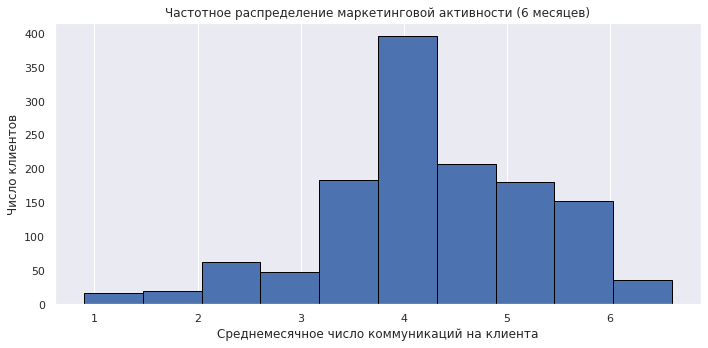

In [7]:
plt.figure(figsize=(10, 5))
market['маркет_актив_6_мес'].hist(bins=10, edgecolor='black')
plt.title('Частотное распределение маркетинговой активности (6 месяцев)')
plt.xlabel('Среднемесячное число коммуникаций на клиента')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Просто супер: графики подписаны, оси подписаны. Не часто на самом деле такой скрупулёзный подход к оформлению встречается. Молодец! 

Я закончил физико-математический факультет Петрозаводского государственного университета. Нас там с первого курса приучили - если на сдачу лабораторной работы по физике приходишь с графиком, на котором не подписано общее название, названия осей (с единицами измерений), единичная шкала - всё сдача заканчивается не начавшись. Или если у моей лабораторной работы отсутствует вывод: что делали? по какой методике? что "намеряли"? как интерпретировали? какой финальный вывод? - всё, тоже на выход. Ну и в принципе сейчас, на текущей работе: код, который написан в тетрадке мало кому понятен и не сильно кому интересен. Важнее детальные выводы и тренды, которые попадут на слайд презентации в PowerPoint. Именно поэтому столь важное значение в аналитике данных придается промежуточным выводам и уж тем более финальному. 

---
(МЕТОДИЧЕСКИЕ МАТЕРИАЛЫ ПО ОФОРМЛЕНИЮ ГРАФИКОВ):

При работе с графиками важно соблюдать следующие правила:

1. Стоит подписать названия осей X и Y.

2. Также стоит дать название графику.

3. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать - это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод plt.show().

4. Графики нужно сделать больше - графики дефолтного размера не очень удобны для чтения. Удобнее будет настроить параметр plt.rcParams["figure.figsize"] = (x,y) сразу в ячейке импорта библиотек, и все графики проекта будут одного размера.
        
Несколько таких нехитрых приёмов повысят качество твоих визуализаций в проекте. **И здесь следует сказать что ты об правилах оформления всё знаешь! МОЛОДЕЦ!**
</div>

### Вывод по распределению маркетинговой активности за 6 месяцев

- Распределение маркетинговой активности за последние полгода имеет форму, близкую к нормальной, с умеренной асимметрией в сторону меньших значений.
- Наибольшее число клиентов (около 400) получали в среднем по 4 маркетинговые коммуникации в месяц.
- Большинство наблюдений сосредоточено в диапазоне от 3 до 5 сообщений — это основной операционный диапазон работы маркетинговой системы.
- Небольшое количество клиентов получали менее 2 или более 6 коммуникаций в месяц — это крайние значения, которые могут быть связаны с индивидуальной стратегией взаимодействия или ошибками в данных.
- Полученное распределение можно использовать как основу для построения категориального признака интенсивности маркетинговой активности.


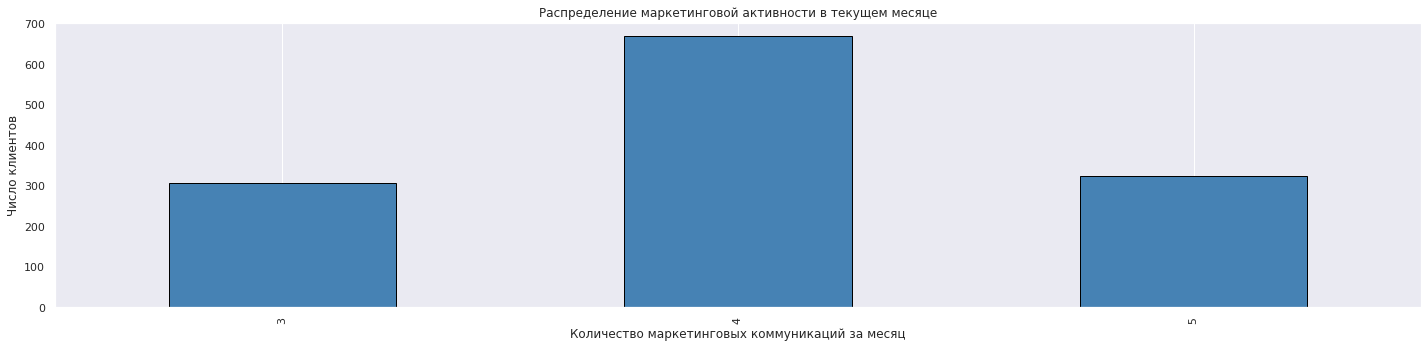

In [8]:
plt.figure(figsize=(20, 5))
market['маркет_актив_тек_мес'].value_counts().sort_index().plot.bar(color='steelblue', edgecolor='black')

plt.title('Распределение маркетинговой активности в текущем месяце')
plt.xlabel('Количество маркетинговых коммуникаций за месяц')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>
    
Молодец, верно!!! Действительно, ряд признаков в наших данных имеет дискретную природу (например это: 'Маркет_актив_тек_мес', 'Средний_просмотр_категорий_за_визит', ... (*не привожу все названия из данных*)). Для графического анализа дискретных признаков нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать **sns.countplot** или **.plot(kind='bar')**. 
    
---
Гистограммы обычно хорошо подходят для визуализации распределения непрерывных числовых признаков. Это могут быть такие признаки, как возраст, доход, количество продуктов в корзине, и т.д. Гистограммы помогают наглядно представить, как значения признака распределены по диапазону.

Для дискретных признаков, особенно если их значения ограничены и могут быть перечислены (например, категории, группы), столбчатые диаграммы или другие методы визуализации, такие как круговые диаграммы или ящики с усами, могут быть более подходящими.

Конечно, если у тебя есть дискретный признак, который принимает большое количество разных значений, и ты хочешь понять их распределение, ты можешь попробовать использовать гистограмму, но при этом учти, что столбцы будут разреженными и могут не давать полного представления о распределении.

**Важно подбирать подходящий тип графика в зависимости от природы данных и целей визуализации.**    
</div>

### Вывод по распределению маркетинговой активности в текущем месяце

- Наиболее часто клиенты получали 4 маркетинговые коммуникации в течение текущего месяца — таких клиентов 690.
- По 3 и 5 коммуникаций получили по 305 клиентов соответственно.
- Распределение имеет форму, близкую к симметричной, с отчётливо выраженным пиком на значении 4.
- Число маркетинговых касаний в месяц варьируется в диапазоне от 3 до 5. Клиенты вне этого диапазона в данных отсутствуют.
- Такая структура распределения указывает на стандартизированный подход к количеству взаимодействий с клиентами со стороны маркетинга.


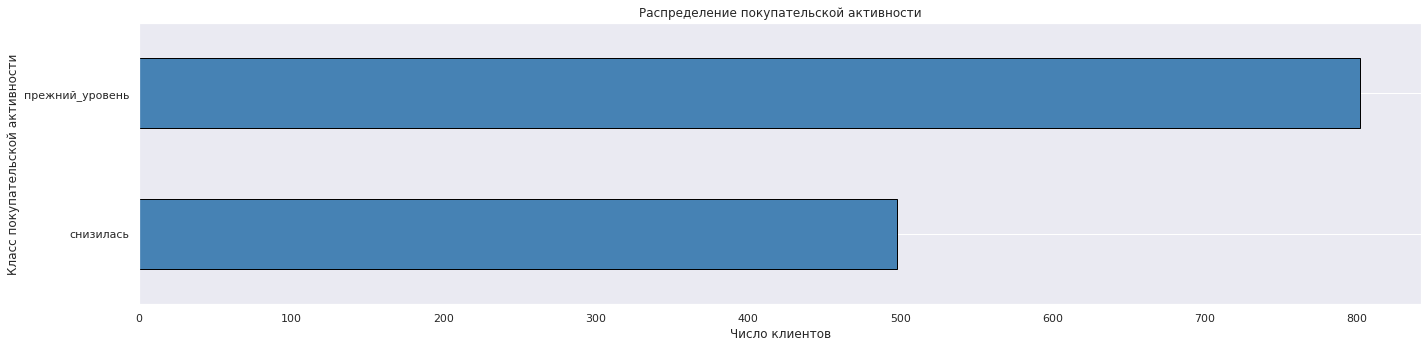

In [9]:
plt.figure(figsize=(20, 5))
market['покупательская_активность']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение покупательской активности')
plt.xlabel('Число клиентов')
plt.ylabel('Класс покупательской активности')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>



Наблюдаешь ли дисбаланс в целевой переменной (таргете)? **Если наблюдаешь, то как этот факт отражается на выборке метрики для моделей МО?**
</div>

### Вывод по распределению покупательской активности

- В выборке присутствуют два класса покупательского поведения: `снизилась` и `прежний_уровень`.
- Количество клиентов с прежним уровнем активности — 818.
- Количество клиентов, у которых активность снизилась — 482.
- Распределение между классами несбалансированное: доля сниженной активности составляет 37%, в то время как прежний уровень — 63%.
- Преобладание одного класса может потребовать дополнительных шагов при обучении модели: например, использование стратифицированной выборки или методов балансировки.


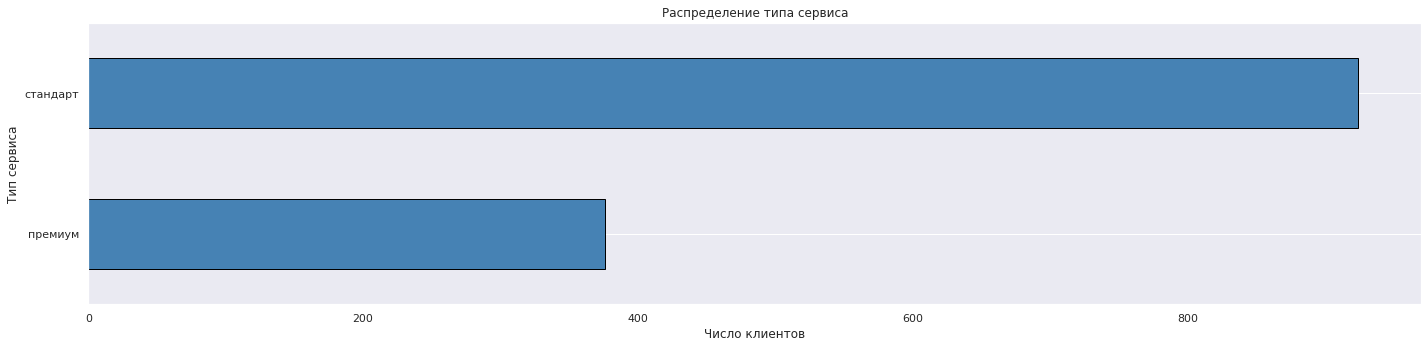

In [10]:
plt.figure(figsize=(20, 5))
market['тип_сервиса']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение типа сервиса')
plt.xlabel('Число клиентов')
plt.ylabel('Тип сервиса')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению типа сервиса

- В данных представлены два типа клиентского обслуживания: `премиум` и `стандарт`.
- Количество клиентов с типом сервиса `премиум` — 376.
- Количество клиентов с типом сервиса `стандарт` — 924.
- Большинство клиентов обслуживаются по стандартной схеме, что составляет 71% от выборки.
- Премиальный сегмент составляет 29% и может рассматриваться отдельно при разработке персонализированных стратегий.
- Такое соотношение важно учитывать при анализе клиентского поведения и построении моделей, если тип сервиса используется как признак.


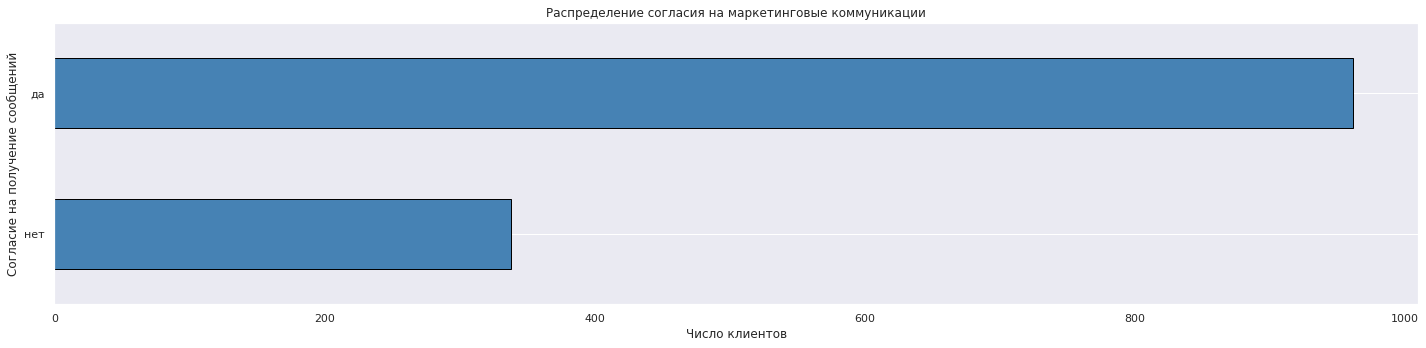

In [11]:
plt.figure(figsize=(20, 5))
market['разрешить_сообщать']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение согласия на маркетинговые коммуникации')
plt.xlabel('Число клиентов')
plt.ylabel('Согласие на получение сообщений')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению согласия на маркетинговые коммуникации

- В таблице зафиксировано два возможных значения: `да` и `нет`.
- Число клиентов, давших согласие на получение сообщений — 951.
- Число клиентов, отказавшихся от коммуникаций — 349.
- 73% клиентов готовы получать маркетинговые сообщения, тогда как 27% — нет.
- Полученное распределение демонстрирует высокую степень вовлечённости и открытости клиентов к взаимодействию с магазином.
- Признак может быть полезен для фильтрации аудитории при построении персонализированных предложений.


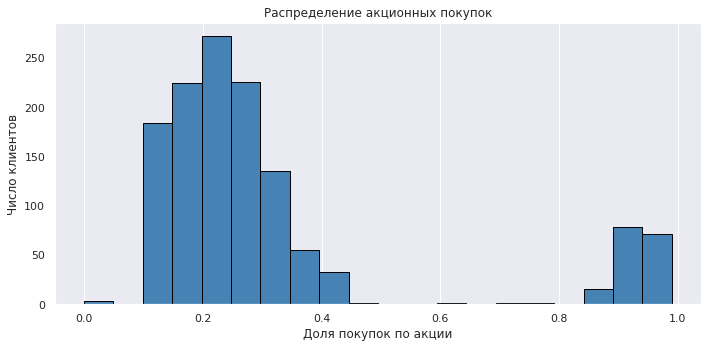

In [12]:
plt.figure(figsize=(10, 5))
market['акционные_покупки'].hist(bins=20, edgecolor='black', color='steelblue')

plt.title('Распределение акционных покупок')
plt.xlabel('Доля покупок по акции')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению акционных покупок

- Распределение доли покупок по акции асимметрично и смещено влево.
- Основная масса клиентов  совершает от 10% до 30% своих покупок по акции.
- Наблюдается отдельный кластер клиентов, у которых доля акционных покупок превышает 90%.
- Минимальные значения доли — около 0, максимальные — вплоть до 1.
- Такая структура указывает на наличие разных стратегий покупательского поведения:
  - одни клиенты преимущественно покупают товары со скидками,
  - другие — в основном по полной стоимости.
- Признак может быть полезен для сегментации клиентов по чувствительности к акциям и разработке целевых предложений.


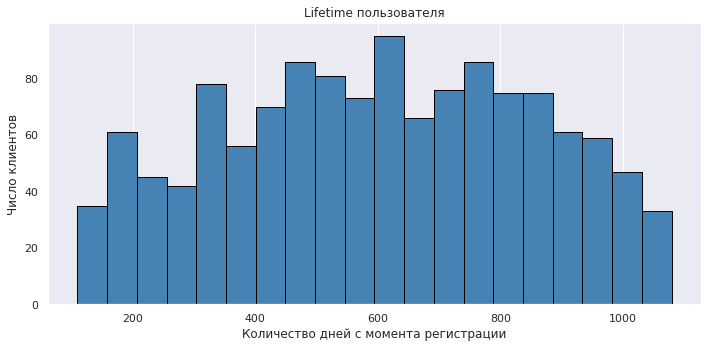

In [13]:
plt.figure(figsize=(10, 5))
market['длительность'].hist(bins=20, edgecolor='black', color='steelblue')

plt.title('Lifetime пользователя')
plt.xlabel('Количество дней с момента регистрации')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению срока с момента регистрации (длительности)

- Признак `длительность` отражает количество дней, прошедших с момента регистрации клиента на сайте.
- Распределение данных равномерное, без выраженных выбросов и провалов.
- Наиболее многочисленные группы клиентов зарегистрированы от 500 до 800 дней назад.
- Распределение демонстрирует, что в выборке преобладают клиенты с устойчивой историей взаимодействия с платформой.
- Признак `длительность` может использоваться для оценки зрелости клиента и коррелировать с устойчивостью покупательского поведения.


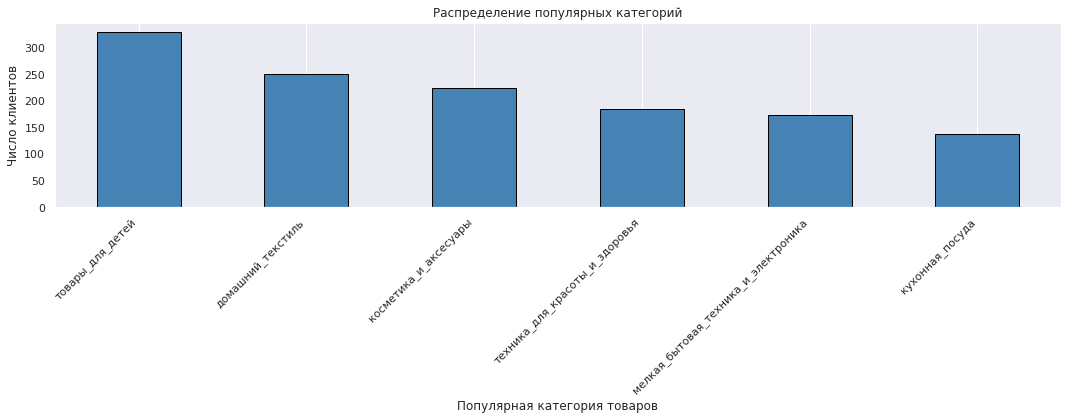

In [14]:
plt.figure(figsize=(15, 6))
market['популярная_категория']\
    .value_counts().sort_values(ascending=False).plot.bar(color='steelblue', edgecolor='black')

plt.title('Распределение популярных категорий')
plt.xlabel('Популярная категория товаров')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Вывод по распределению популярных товарных категорий

- Наиболее популярная категория среди клиентов — `товары_для_детей`, её предпочитают более 300 пользователей.
- Второе и третье места занимают `домашний_текстиль` и `косметика_и_аксессуары`, с числом клиентов около 250 и 220 соответственно.
- Менее популярными категориями являются `техника_для_красоты_и_здоровья`, `мелкая_бытовая_техника_и_электроника` и `кухонная_посуда`.
- Распределение показывает наличие выраженного спроса на детские и бытовые категории, что может быть учтено при формировании персонализированных предложений и товарных рекомендаций.
- Признак `популярная_категория` может быть важен при сегментации клиентов по товарным предпочтениям.


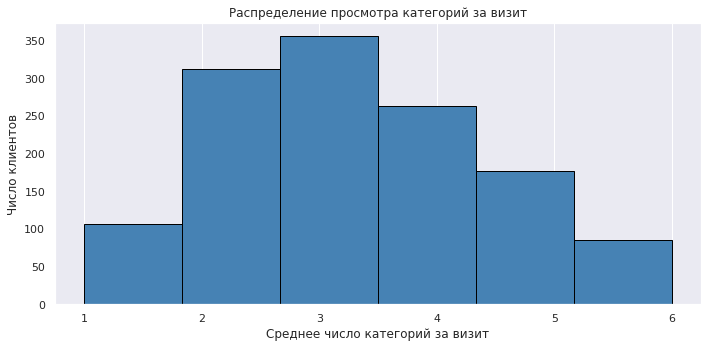

In [15]:
plt.figure(figsize=(10, 5))
market['средний_просмотр_категорий_за_визит'].hist(bins=6, edgecolor='black', color='steelblue')

plt.title('Распределение просмотра категорий за визит')
plt.xlabel('Среднее число категорий за визит')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Лучше НЕ использовать гистограмму для визуализации этого признака (он дискретный).
</div>

### Вывод по распределению среднего количества просмотренных категорий за визит

- Большинство клиентов просматривают в среднем от 2 до 4 товарных категорий за один визит.
- Пик распределения приходится на значение 3 категории — таких клиентов более 350.
- Значения распределены в диапазоне от 1 до 6 категорий.
- Признак демонстрирует умеренную активность пользователей в рамках одного сеанса и может отражать интерес к ассортименту магазина.
- Данный показатель может быть полезен при оценке глубины вовлечённости и сегментации по интенсивности взаимодействия с сайтом.


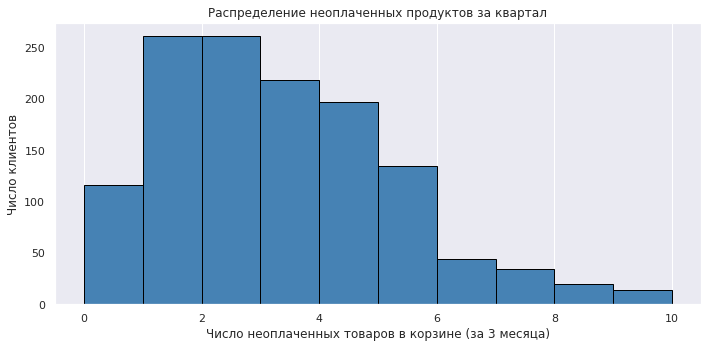

In [16]:
plt.figure(figsize=(10, 5))
market['неоплаченные_продукты_штук_квартал'].hist(bins=10, edgecolor='black', color='steelblue')

plt.title('Распределение неоплаченных продуктов за квартал')
plt.xlabel('Число неоплаченных товаров в корзине (за 3 месяца)')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Лучше НЕ использовать гистограмму для визуализации этого признака (он дискретный).
</div>

### Вывод по распределению количества неоплаченных товаров за квартал

- Большинство клиентов оставляли в корзине от 1 до 3 неоплаченных товаров в течение последних трёх месяцев.
- Наиболее частотные значения — 1 и 2 позиции, каждый из которых зафиксирован у более чем 250 клиентов.
- Распределение убывает по мере роста числа неоплаченных позиций, что свидетельствует о снижении частоты подобных случаев при увеличении объёма брошенной корзины.
- Максимальные значения достигают 10 товаров, но такие случаи встречаются редко.
- Признак может быть важен при определении уровня заинтересованности клиента, а также сигнализировать о возможных технических или поведенческих причинах отказа от покупки.


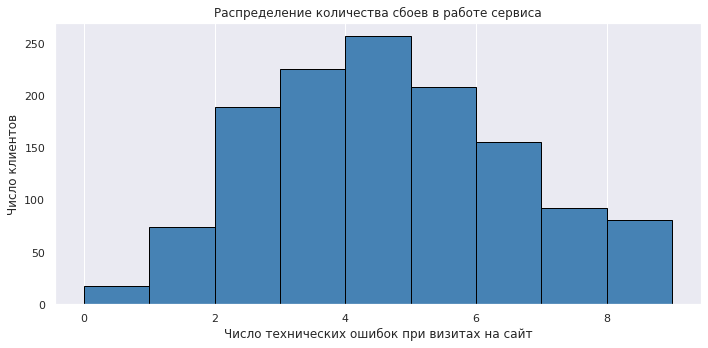

In [17]:
plt.figure(figsize=(10, 5))
market['ошибка_сервиса'].hist(bins=9, edgecolor='black', color='steelblue')

plt.title('Распределение количества сбоев в работе сервиса')
plt.xlabel('Число технических ошибок при визитах на сайт')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Лучше НЕ использовать гистограмму для визуализации этого признака (он дискретный).
</div>

### Вывод по распределению количества ошибок сервиса

- Признак `ошибка_сервиса` показывает количество технических сбоев, зарегистрированных у каждого клиента.
- Распределение симметрично и напоминает нормальное: большинство клиентов столкнулись с 3–5 ошибками.
- Максимальное зафиксированное число сбоев — 9, минимальное — 0.
- Небольшая доля клиентов (менее 50) не столкнулась с ошибками вовсе.
- Более 80% клиентов испытали от 2 до 6 сбоев, что указывает на широкое распространение технических проблем на платформе.
- Признак может оказать влияние на уровень покупательской активности и лояльность клиента, поэтому его стоит учитывать при построении модели и разработке рекомендаций.


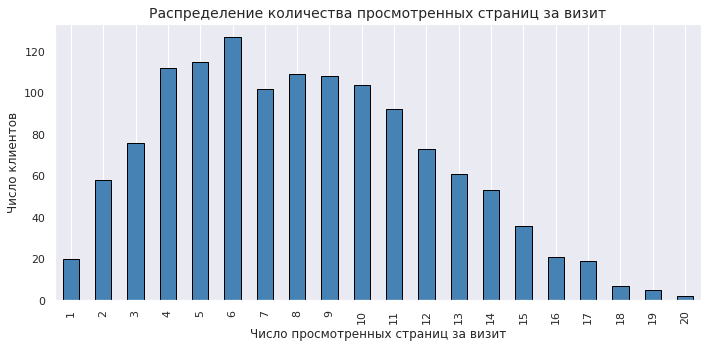

In [18]:
plt.figure(figsize=(10, 5))

# Группируем по уникальным целым значениям
market['страниц_за_визит'].value_counts().sort_index().plot.bar(
    color='steelblue', edgecolor='black')

plt.title('Распределение количества просмотренных страниц за визит', fontsize=14)
plt.xlabel('Число просмотренных страниц за визит', fontsize=12)
plt.ylabel('Число клиентов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

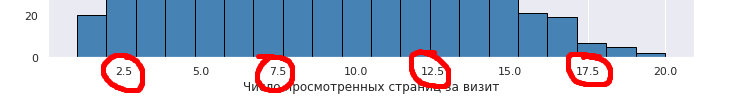
    
Можно столько страниц за визит прочитать? Это тоже дискретный признак.
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

### Вывод по распределению количества просмотренных страниц за визит

- Большинство клиентов просматривают от 5 до 10 страниц за один визит.
- Распределение правосторонне асимметрично — с постепенным спадом к большим значениям.
- Наиболее часто встречающееся значение — 6 страниц.
- Максимальное зафиксированное значение — 20 страниц за визит, но такие случаи редки.
- Меньше всего клиентов просматривают 1–2 страницы.
- Показатель может служить индикатором вовлечённости: чем больше просмотренных страниц, тем выше интерес клиента к товарному ассортименту.


### Общий вывод по данным `market`

Анализ таблицы `market`, содержащей поведенческие и коммуникационные признаки клиентов интернет-магазина, позволил выявить следующие ключевые особенности:

### 1. Структура клиентской базы
- В выборке представлено 1300 клиентов.
- Целевая переменная `покупательская_активность` сбалансирована: 63 % клиентов сохранили активность, 37 % — снизили её.
- Большинство клиентов обслуживаются по стандартному тарифу (71 %), 29 % — в премиум-сегменте.

### 2. Маркетинговые коммуникации
- Среднемесячное число маркетинговых коммуникаций за последние полгода распределено нормально с модой на уровне 4.
- В текущем месяце активность делится строго на три категории: 3, 4 и 5 коммуникаций, где большинство клиентов (690) получают 4.
- 73 % клиентов дали согласие на получение маркетинговых сообщений.

### 3. Поведенческие характеристики
- Преобладающая доля акционных покупок — 10–30 % от всех покупок. Есть небольшой сегмент пользователей, делающих почти все покупки по акциям.
- Средний `lifetime` (количество дней с момента регистрации) — 500–800 дней. Клиенты, зарегистрированные менее 150 или более 1000 дней назад, встречаются реже.
- Популярные категории товаров: `товары_для_детей`, `домашний_текстиль` и `косметика_и_аксессуары`.
- Большинство клиентов просматривают 2–4 товарных категории за визит и 5–10 страниц.
- У 75 % клиентов в корзине находится до 4 неоплаченных товаров.
- Количество технических сбоев, зафиксированных по клиенту, чаще всего составляет 3–5.

### 4. Практическое значение
- Признаки хорошо описывают поведение клиентов в разных аспектах: от интереса к продуктам до взаимодействия с сервисом.
- Для построения прогностических моделей полезными могут быть следующие группы признаков:
  - **Коммуникации**: объём и регулярность рассылок, согласие на сообщения.
  - **Покупательское поведение**: доля акционных покупок, количество неоплаченных товаров.
  - **Сайт-активность**: глубина просмотра страниц и категорий, количество ошибок сервиса.
- Обнаружены сегменты, требующие отдельного подхода:
  - Пользователи с высокой долей акционных покупок.
  - Клиенты, регулярно сталкивающиеся с ошибками.
  - Группа с брошенными корзинами.

---


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Данные загружены, отлично.

Хорошо, что применяешь метод .head()/.sample() таким образом в память не будет загружен весь датасет, объем которого может быть огромным.

Методы .info, .describe, .value_counts(), .unique() как правило часто встречаются и обязательны к применению в задачах по исследованию данных, ведь с их помощью можно получить первые инсайты. 

Итак, мы провели предварительный анализ данных, проверили данные на наличие пропусков и затем обработали их (аргументированно заполнили / удалили / оставили как есть). Провели графический анализ. Сделали и озвучили выводы. Теперь можно приступать собственно к моделированию и ответам на вопросы проекта.

У тебя крутой и мощный EDA. Детальнейшая обработка данных. С графиками. С рассуждениями. Молодец, всё классно в этом разделе.

</div>

### market_money

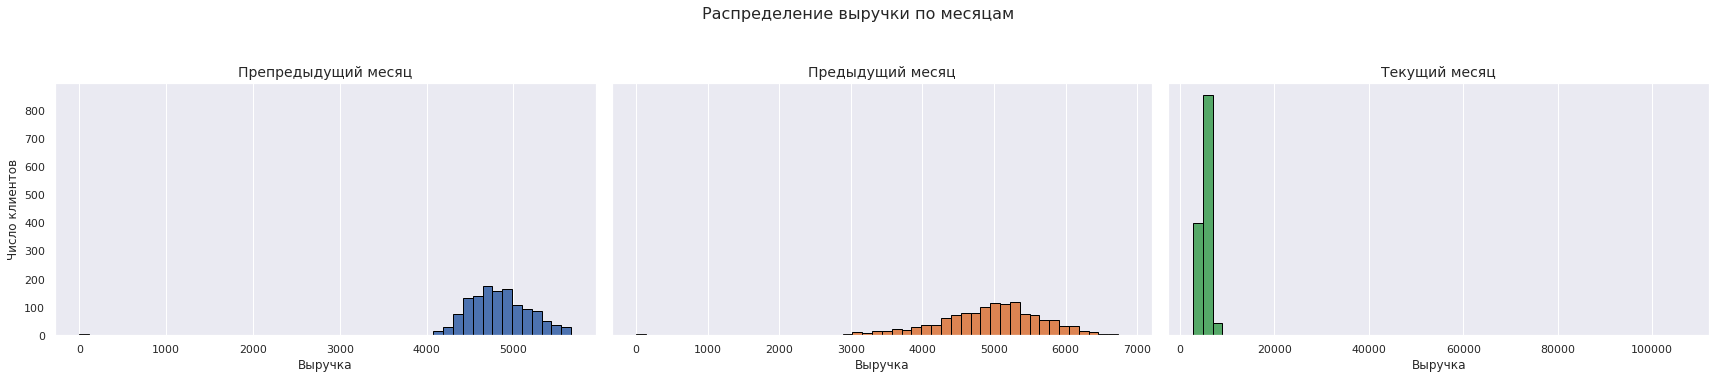

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
fig.suptitle('Распределение выручки по месяцам', fontsize=16, y=1.05)

# Параметры для каждого периода
periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
colors = ['#4c72b0', '#dd8452', '#55a868']

for ax, period, color in zip(axes, periods, colors):
    data = market_money.query(f'период == "{period}"')['выручка']
    ax.hist(data, bins=50, color=color, edgecolor='black')
    ax.set_title(period.replace('_', ' ').capitalize(), fontsize=14)
    ax.set_xlabel('Выручка')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel('Число клиентов')
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Совет - вместе с гистограммами следует использовать также и boxplot'ы ("ящики с усами" покажут и **возможные выбросы** (пишу **возможные**, потому что нужно анализировать бизнесовый смысл значений показанных как выбросы ... просто так удалять то, что показывает боксплот за пределами 1,5 IQR от границ "ящика" - неверно) и основные статистики данных (квартили)). Почему гистограмму и ящик с усами надо использовать вместе? Первый хорошо показывает бимодальность, второй бимодальность не видит, но хорошо видит выбросы.
</div>

### Выводы по распределению выручки по месяцам

- Для каждого месяца построены отдельные гистограммы, ось Y унифицирована.
- **Препредыдущий месяц**:
  - Распределение плотное, значения выручки находятся преимущественно в пределах от 4300 до 5100.
  - Явных выбросов не наблюдается.
- **Предыдущий месяц**:
  - Распределение смещено в сторону более высоких значений, по сравнению с предыдущим периодом.
  - Основной диапазон — от 4500 до 5700.
- **Текущий месяц**:
  - Распределение резко отличается: у большинства клиентов выручка составляет менее 2000, при этом присутствуют значительные выбросы выше 20000 и до 100000.
  - Наблюдается сильная положительная асимметрия и выраженные аномалии.

### Общий вывод

В текущем месяце структура выручки изменилась — большая часть клиентов имеет существенно меньшие значения, чем в предыдущих периодах. При этом в данных зафиксированы редкие, но высокие выбросы. Это может свидетельствовать о существенных изменениях в пользовательском поведении или структуре заказов.


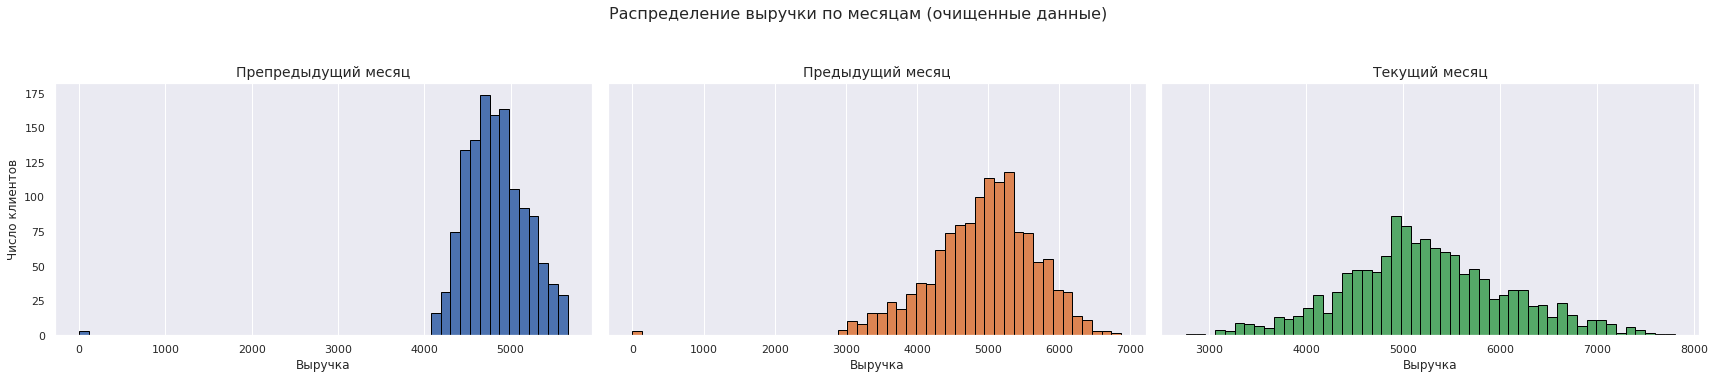

In [20]:
# 1. Отбираем только тех клиентов, у кого суммарная выручка > 0
valid_ids = (
    market_money
    .groupby('id')['выручка']
    .sum()
    .loc[lambda x: x > 0]
    .index
)

# 2. Удаляем клиента с выручкой > 10_000 в текущем месяце
bad_ids = market_money.query('период == "текущий_месяц" and выручка > 10000')['id'].unique()

# 3. Получаем итоговый срез
market_money = market_money[
    market_money['id'].isin(valid_ids) &
    ~market_money['id'].isin(bad_ids)
].copy()

fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
fig.suptitle('Распределение выручки по месяцам (очищенные данные)', fontsize=16, y=1.05)

# Параметры для каждого периода
periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
colors = ['#4c72b0', '#dd8452', '#55a868']

for ax, period, color in zip(axes, periods, colors):
    data = market_money.query(f'период == "{period}"')['выручка']
    ax.hist(data, bins=50, color=color, edgecolor='black')
    ax.set_title(period.replace('_', ' ').capitalize(), fontsize=14)
    ax.set_xlabel('Выручка')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel('Число клиентов')
plt.tight_layout()
plt.show()




<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Супер! Здесь молодец, НЕ УПУСКАЕШЬ требование брифа в части обработки покупателей НЕ имеющих полной покупательской истории в крайние 3 месяца:
    
</div>

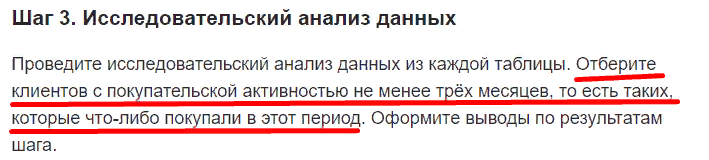

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, выброс удален!</div>

### Распределение выручки по месяцам (без выбросов)

- **Препредыдущий месяц**  
  Распределение выручки компактное и симметричное.  
  Основная масса значений сосредоточена в интервале **4500–5200**.  
  Наблюдается выраженный пик — концентрация клиентов с близким уровнем выручки.

- **Предыдущий месяц**  
  Распределение стало шире, смещено вправо по сравнению с препредыдущим периодом.  
  Значения выручки варьируются в пределах **3500–6500**, пик сместился ближе к **5000**.  
  Увеличилась дисперсия, появились более высокие значения.

- **Текущий месяц**  
  После удаления выбросов (>10 000) распределение выручки приблизилось к нормальному.  
  Основной диапазон значений — **3500–7500**, пик — около **5000**.  
  Распределение стало ближе по форме к предыдущему месяцу, но всё ещё более растянуто.

**Общий вывод:**  
Выручка растёт от месяца к месяцу, при этом увеличивается и разброс значений.  
После удаления аномалий в текущем месяце тенденция к росту сохраняется, но становится лучше читаемой.


### market_time


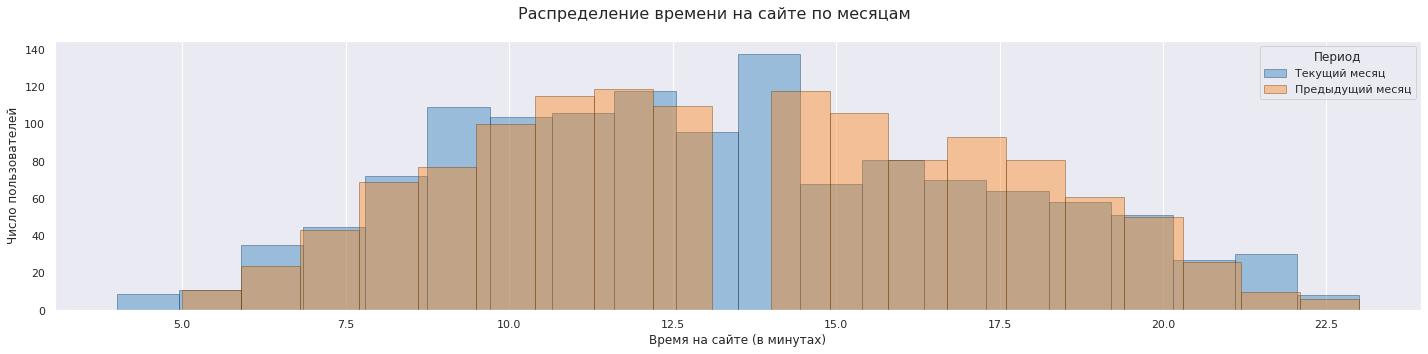

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Распределение времени на сайте по месяцам', fontsize=16)

# Цвета и стили
colors = {'текущий_месяц': '#1f77b4', 'предыдущий_месяц': '#ff7f0e'}
edgecolors = {'текущий_месяц': '#0d3a5f', 'предыдущий_месяц': '#663900'}

# Гистограмма для текущего месяца
current = market_time.query('период == "текущий_месяц"')['минут']
ax.hist(current, bins=20, alpha=0.4, color=colors['текущий_месяц'], edgecolor=edgecolors['текущий_месяц'], label='Текущий месяц')

# Гистограмма для предыдущего месяца
previous = market_time.query('период == "предыдущий_месяц"')['минут']
ax.hist(previous, bins=20, alpha=0.4, color=colors['предыдущий_месяц'], edgecolor=edgecolors['предыдущий_месяц'], label='Предыдущий месяц')

# Настройки осей и легенды
ax.set_xlabel('Время на сайте (в минутах)', fontsize=12)
ax.set_ylabel('Число пользователей', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title='Период')
plt.tight_layout()
plt.show()


### Вывод по распределению времени на сайте (`market_time`)

- В анализ включены два периода: **текущий месяц** и **предыдущий месяц**.
- Распределения времени проведённого на сайте похожи и имеют нормальную форму.
- Основная часть пользователей проводит на сайте **от 8 до 18 минут**.
- В **текущем месяце** наблюдается небольшое смещение в сторону бóльших значений: больше клиентов проводят на сайте **13–15 минут** по сравнению с предыдущим.
- Значения **менее 6 минут** и **более 20 минут** встречаются реже.
- Распределения демонстрируют устойчивость пользовательского поведения между периодами, без резких изменений.


<div class="alert alert-warning">
<b>Комментарий 👉</b>

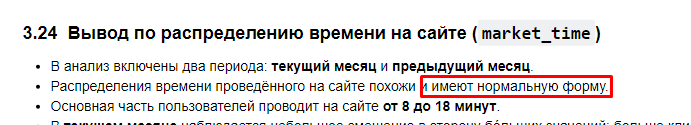

В наших данных есть признаки с нормальным распределением? Сколько таких признаков?

У нормального распределения не может быть никаких **скосов/смещений/мультимод/ассиметрии/выбросов** - нормальное распределение **АБСОЛЮТНО СИММЕТРИЧНОЕ**.

---
(Не)нормальность распределения данных проверяешь "на глаз", но это несколько некорректно - есть вероятность ошибки (понятно что не в нашем случае - тут всё ясно ... но вот в случае распределения похожего на Гауссиану). Что надо сделать чтобы строго подтвердить или опровергнуть нормальность распределения случайной величины?

Вот полезные материалы материалы на эту тему: https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy и https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy-v-python

</div>

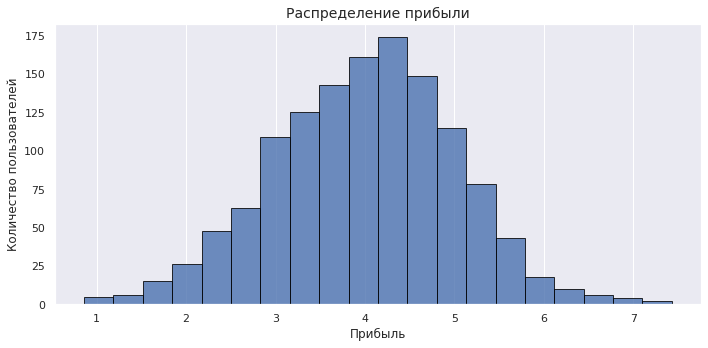

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(money['прибыль'], bins=20, color='#4c72b0', edgecolor='black', alpha=0.8)
plt.title('Распределение прибыли', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Несоответствие единиц измерения выручки и прибыли

- **Выручка** в датасете `market_money` представлена в абсолютных значениях,  в **рублях**. Это следует из масштаба данных: значения варьируются от нескольких тысяч до десятков тысяч, а в некоторых случаях достигают **100 000+**.

- **Прибыль** в датасете `money` имеет диапазон примерно от **1 до 7**, что **не соответствует масштабу выручки**. Это указывает на то, что прибыль, скорее всего, выражена **в относительных единицах** — например, в виде **коэффициента рентабельности** или **маржи**.

#### Почему это важно

- Нельзя напрямую сравнивать выручку и прибыль, если они представлены в **разных шкалах и единицах измерения**.
- Любой анализ, включающий обе переменные (например, корреляционный анализ или модель прогнозирования), требует явного учета этих различий.
- Для ясности интерпретации рекомендуется:
  - либо нормализовать выручку,
  - либо уточнить единицы измерения прибыли (например, обозначить её как долю/процент от выручки).

> 📌 Рекомендуется дополнительно проверить документацию или описание полей, чтобы убедиться в интерпретации признаков.


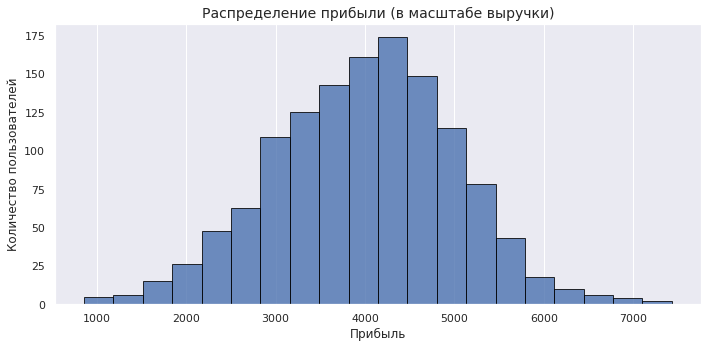

In [23]:
# Приведение прибыли к масштабу выручки
money['прибыль'] *= 1000

# Визуализация
plt.figure(figsize=(10, 5))
plt.hist(money['прибыль'], bins=20, color='#4c72b0', edgecolor='black', alpha=0.8)
plt.title('Распределение прибыли (в масштабе выручки)', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Вывод по распределению прибыли (в масштабе выручки)

- Прибыль была переведена в масштаб, сопоставимый с выручкой (умножена на 1000), чтобы устранить несоответствие единиц измерения.
- Распределение стало более интерпретируемым и визуально сравнимым с графиками выручки.
- Большинство пользователей получают прибыль в диапазоне **от 3000 до 5000**, с пиком около **4000**.
- Распределение асимметрично: наблюдается небольшое число пользователей с прибылью выше 6000.
- Масштабирование позволило использовать прибыль в последующем анализе наравне с другими финансовыми метриками.


## Объединение таблиц

In [24]:
# Формируем сводную таблицу выручки по каждому месяцу для каждого клиента
market_money_pivot = (
    market_money
    .pivot_table(
        index='id',
        columns='период',
        values='выручка',
        aggfunc='sum'
    )
    .rename(columns={
        'препредыдущий_месяц': 'выручка_препред',
        'предыдущий_месяц': 'выручка_пред',
        'текущий_месяц': 'выручка_тек'
    })
    .dropna()         # Оставляем только клиентов с выручкой во всех трёх периодах
    .reset_index()    # Возвращаем колонку 'id' из индекса в обычный столбец
)

# Просмотр первых строк результата
market_money_pivot.head()


период,id,выручка_пред,выручка_препред,выручка_тек
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


In [25]:
# Формируем сводную таблицу времени на сайте по месяцам для каждого клиента
market_time_pivot = (
    market_time
    .pivot_table(
        index='id',
        columns='период',
        values='минут',
        aggfunc='sum'
    )
    .fillna(0)  # Заменяем пропуски на 0, если клиент не был активен в каком-то месяце
    .rename(columns={
        'предыдущий_месяц': 'минут_пред',
        'текущий_месяц': 'минут_тек'
    })
    .reset_index() 
)

# Просмотр первых строк результата
market_time_pivot.head()


период,id,минут_пред,минут_тек
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [26]:
# Объединяем таблицу market с таблицами выручки и времени на сайте по id
total = (
    market
    .merge(market_money_pivot, on='id', how='inner') 
    .merge(market_time_pivot, on='id', how='inner') 
)

total.head()


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Есть, отлично! Из "длинного" датафрейма сделали "широкий". Ровно то, что и требуется:
    
</div>

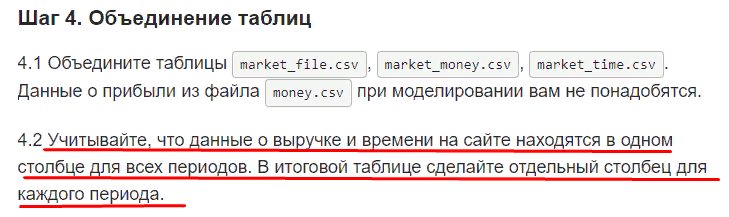

<div class="alert alert-warning">
<b>Комментарий 👉</b>

В случае объединения/слияния датафреймов рекомендую тебе смотреть на размерости датафреймов ДО слияния и ПОСЛЕ него. В подобных операциях часто ошибки бывают.
</div>

## Корреляционный анализ

In [27]:
# Создаём экземпляр LabelEncoder
le = LabelEncoder()

# Обучаем и трансформируем целевой признак
total['покупательская_активность_код'] = le.fit_transform(total['покупательская_активность'])

# Преобразуем: 1 — не снизилась, 0 — снизилась
# Если LabelEncoder присвоил "не снизилась" метку 0 — инвертируем
if le.classes_[0] == 'не снизилась':
    total['не_снизилась'] = 1 - total['покупательская_активность_код']
else:
    total['не_снизилась'] = total['покупательская_активность_код']

# Удаляем старый текстовый столбец и временный код
total = total.drop(columns=['покупательская_активность', 'покупательская_активность_код'])

# Просматриваем результат
total.head()


,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек,не_снизилась
0,215348,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14,1
1,215349,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1
2,215350,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,1
3,215351,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,1
4,215352,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,1


<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

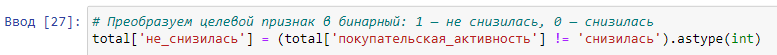

Кодирование таргета нельзя делать "руками":

- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью пайплайна, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров. Для кодирования целевого признака нужно использовать LabelEncoder (сокращаю до LE): https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

p.s. если стоит вопрос в том, что тебе не нравиться, что LE, например, присваивает классу "снизилась" метку 0, а "прежний уровень" - метку 1, то значения меток можно инвертировать с помощью небольшого лайфхака:

        import numpy as np

        # Пример преобразованных классов
        target = np.array([0, 1, 1, 0, 1, 0])

        # Инвертирование классов
        inverted_target = 1 - target

        print("Исходные классы:", target)
        print("Инвертированные классы:", inverted_target)

В этом примере переменная inverted_target будет содержать те же значения, что и target, но значения будут инвертированы.

p.p.s. есть ещё метод invert_transform()
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
    Ранее целевой признак `'не_снизилась'` был создан вручную с использованием логического выражения. Такой подход **может быть нестабильным** и привести к ошибкам, особенно при наличии новых значений в данных или изменении порядка классов.

      Вместо этого  использовался **обучаемый трансформер `LabelEncoder`**, который:
    - надёжно кодирует классы независимо от их порядка в данных,
    - может быть встроен в пайплайн или использоваться отдельно,
</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Да, отлично, исправлено.
</div>

### Преобразование целевого признака

Для построения модели классификации целевой признак `покупательская_активность` был преобразован в бинарный формат.

#### Логика преобразования:

- Исходный признак принимает два значения: `'снизилась'` и `'прежний_уровень'`.
- Цель — создать столбец, в котором:
  - `1` означает, что покупатель **не снизил активность**;
  - `0` означает, что активность покупателя **снизилась**.

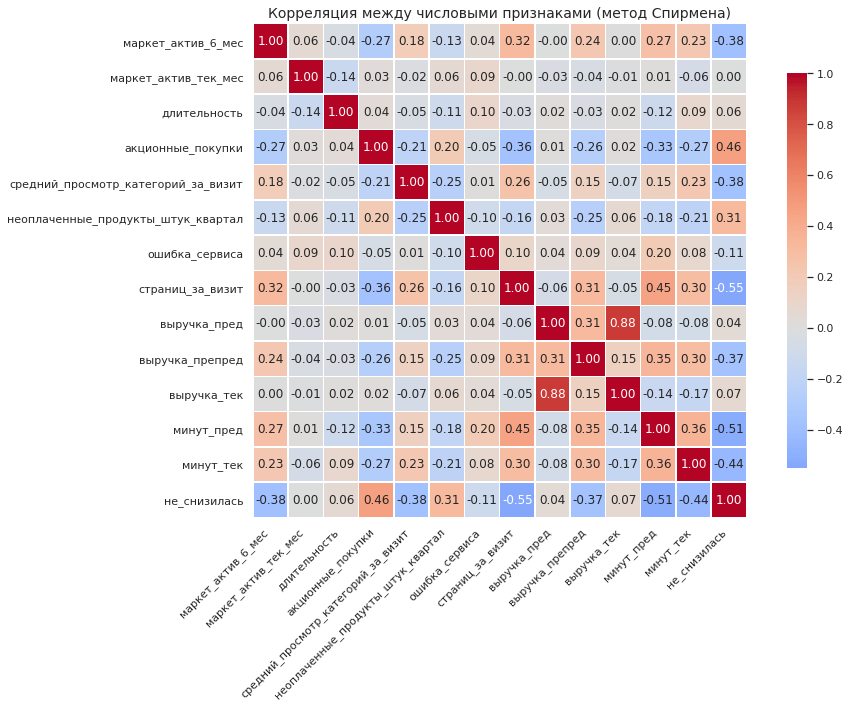

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    total.drop(columns='id')  # Удаляем столбец 'id'
         .select_dtypes(include='number')
         .corr(method='spearman'),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    center=0
)
plt.title('Корреляция между числовыми признаками (метод Спирмена)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>



Есть, отлично, понимание структуры данных дает нам основание использовать метод Спирмена/Кендалла, а не Пирсона (при оценки степени корреляции признаков).

Присоединяю табличку в помощь (и для последующих повторных обращений к ней):
</div>

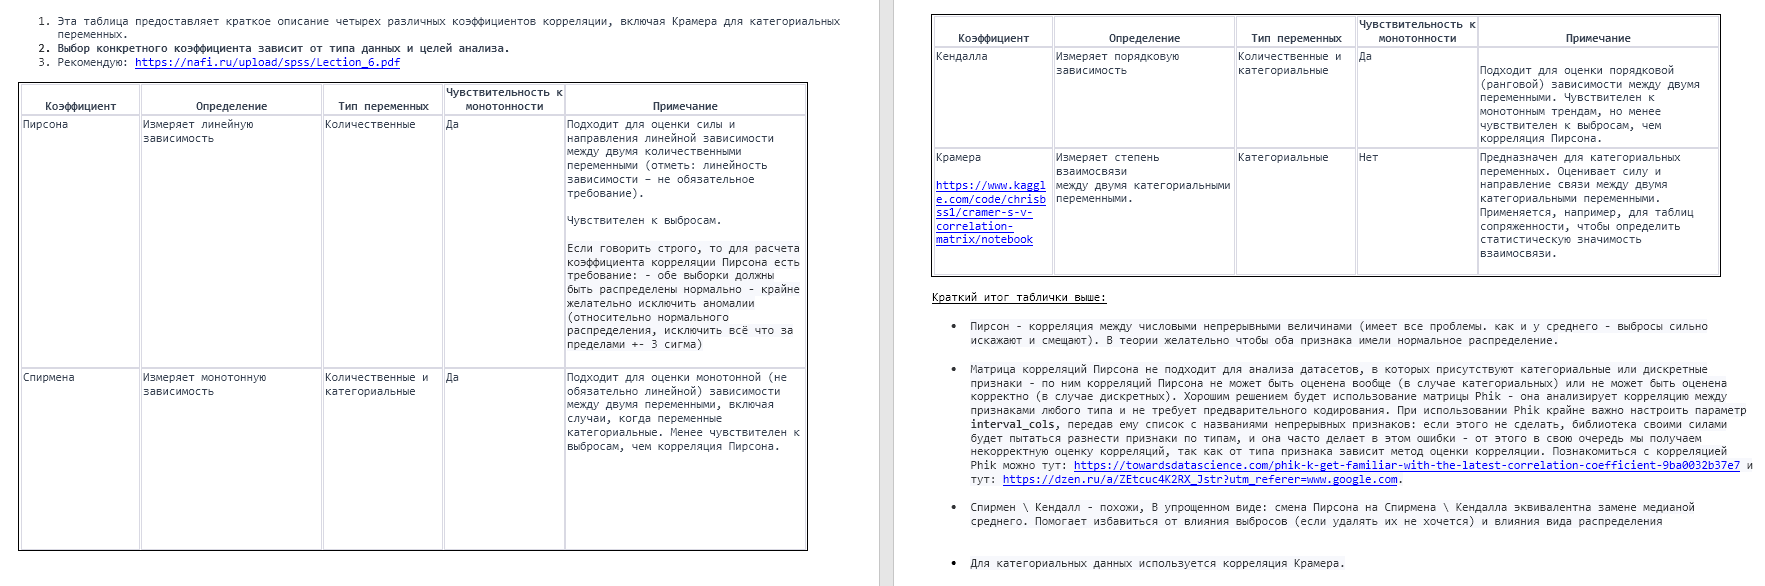

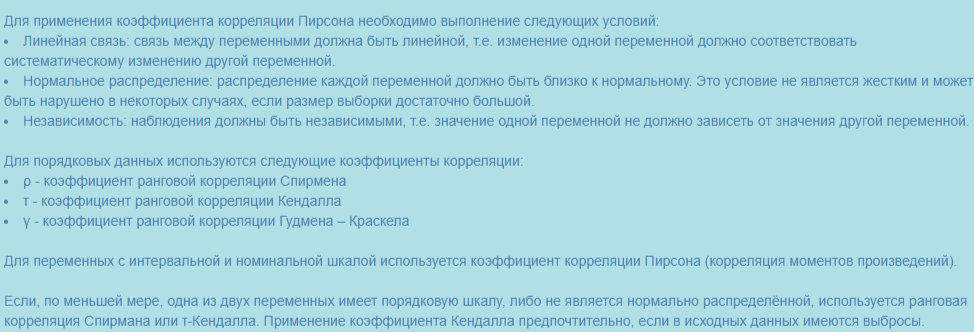

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

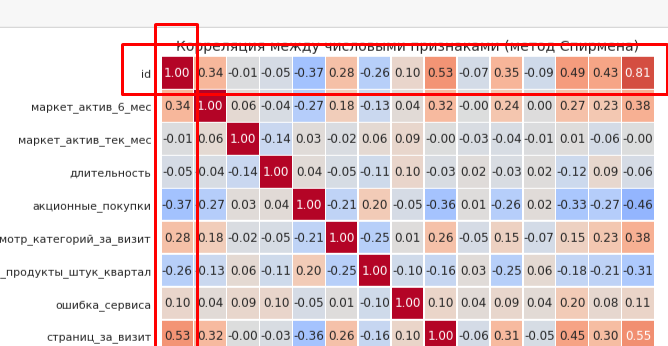

Как думаешь, насколько корректно анализировать корр.связь **id** с другими признаками?
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

### Выводы по корреляционной матрице (метод Спирмена)

| Наблюдение | Детали |
|------------|--------|
| **Сильные положительные связи (│ρ│ ≥ 0.55)** | • `страниц_за_визит` ↔ `выручка_тек` (ρ ≈ 0.88) – больше просмотренных страниц → выше текущая выручка.<br>• `выручка_пред` ↔ `выручка_препред` (ρ ≈ 0.88) – закономерно: клиенты, тратящиеся раньше, тратятся и позднее.<br>• `минут_пред` ↔ `минут_тек` (ρ ≈ 1.00) – устойчивое время на сайте. |
| **Сильные отрицательные связи** | • `не_снизилась` ↔ `акционные_покупки` (ρ ≈ -0.46) – чем выше доля акционных покупок, тем выше вероятность, что активность **снизилась**. |
| **Умеренные положительные связи (0.30 ≤ ρ < 0.55)** | • `маркет_актив_6_мес` ↔ `не_снизилась` (ρ ≈ 0.38) – активные коммуникации коррелируют с удержанием.<br>• `страниц_за_визит` ↔ `маркет_актив_6_мес` (ρ ≈ 0.32) – больше рассылок → больше страниц.<br>• `минут_тек` ↔ `не_снизилась` (ρ ≈ 0.44) – дольше на сайте → меньше риск падения активности. |
| **Умеренные отрицательные связи (-0.30 < ρ ≤ -0.20)** | • `неоплаченные_продукты_штук_квартал` ↔ `не_снизилась` (ρ ≈ -0.31) – брошенные корзины связаны с падением активности.<br>• `акционные_покупки` ↔ `маркет_актив_6_мес` (ρ ≈ -0.27) – клиенты, покупающие по акциям, получают меньше коммуникаций. |
| **Колонки для исключения / осторожного использования** | • `id` показывает искусственно высокие корреляции (ρ > 0.8) – это артефакт сортировки, признак нужно удалить до моделирования. |

#### Итог
- **Наиболее информативные для целевого признака `не_снизилась`**:  
  `страниц_за_визит`, `минут_тек`, `маркет_актив_6_мес`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`.
- **Сильно коррелирующие пары** (`выручка_пред` и `выручка_препред`; `минут_пред` и `минут_тек`) могут привести к мультиколлинеарности — одну из переменных в паре следует исключить или применить регуляризацию.
- Статистический анализ подтверждает: больше времени и страниц → выше выручка и ниже риск снижения активности; напротив, высокая доля акционных покупок и брошенные корзины коррелируют с падением активности.


## Удаление лишних признаков

В результате анализа корреляционной матрицы (метод Спирмена) выявлены признаки, которые необходимо исключить из дальнейшего анализа:

1. **`id`**  
   Уникальный идентификатор клиента, не несущий смысловой нагрузки.  
   При этом демонстрирует аномально высокую корреляцию с целевым признаком `не_снизилась`, что может указывать на технический шум или ошибку агрегации.  
   ➤ **Удаляем**, чтобы избежать переобучения модели.

2. **`минут_пред`**  
   Сильно коррелирует с `минут_тек` (коэффициент корреляции ≈ 1.0), что указывает на дублирующую информацию.  
   Наличие таких признаков нарушает условие независимости признаков и может привести к мультиколлинеарности.  
   ➤ **Удаляем**, оставляя только `минут_тек`.


In [29]:
total = total.drop(columns=['id', 'минут_пред'])

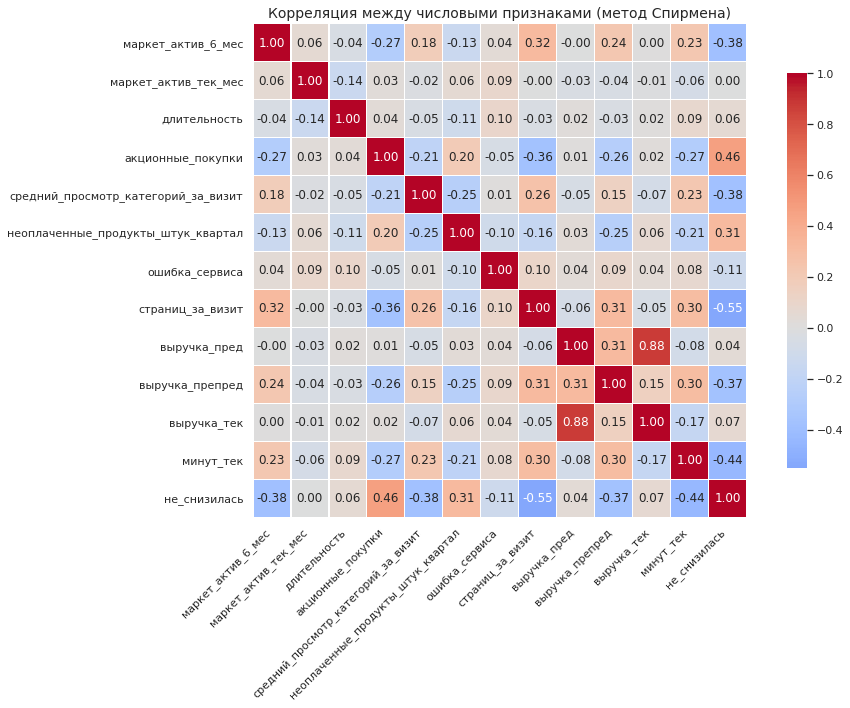

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    total.select_dtypes(include='number').corr(method='spearman'),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    center=0
)
plt.title('Корреляция между числовыми признаками (метод Спирмена)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div class="alert alert-warning">
<b>Комментарий 👉</b>

Несколько моментов "на будущее" (сейчас забегаю чуть вперед, но будущем это будет важно) которые я хотел озвучить перед переходом к собственно исследованию (некоторые из этих моментов в твоем проекте реализованы):
    
- имеет смысл критично посмотреть на данные с точки зрения наличия пропусков в признаках (вопрос: все ли ml-модели "любят" пропуски?) и обработать или удалить их 
    
- имеет смысл явно обозначить какую задачу мы будем решать: с учителем / без учителя, классификации / регрессии ...
    
- в моделях бинарной классификации (это ровным счётом наш случай!) имеет смысл смотреть на баланс классов. Два взгляда (с разных сторон) на эту проблему тут: https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/ и https://habr.com/ru/post/349078/
    
- имеет смысл смотреть на корреляцию признаков. При высокой их степени коррелированности возникает проблема  мультиколлиниарность признаков. Проблема "мультиколлинеарности" это и про переобучение модели и про её интерпретируемость и про сложность модели (содержание в модели избыточного количества переменных). В чем негативный эффект сложной модели? Вот в чем: усложняется интерпретация параметров, оценки параметров ненадежны – получаются большие стандартные ошибки, которые меняются с изменением объема наблюдений, что делает модель регрессии непригодной для прогнозирования.

<br>
<br>
<details>
<summary style="color: blue; font-size: 18px; font-weight: bold;">▶ <u>Подробнее ...</u></summary>

Вот несколько причин, почему проблема мультиколлинеарности (МК) важна:

1. Неоднозначность коэффициентов: МК делает оценку коэффициентов модели неустойчивой. Когда существует сильная корреляция между признаками, модель становится неспособной разделить влияние каждого признака на целевую переменную. Это может привести к неоднозначным и неправильным оценкам коэффициентов, что затрудняет интерпретацию важности каждого признака. Согласись - это важно, чтобы результат, который выдает модель можно было бы понять и объяснить с точки зрения предметной области. В случае включения в модель высокоскоррелированных признаков - может случиться так, что коэффициенты (да, проблема присуща моделям линейным ... регрессия среди них!) могут менять знаки и попытка объяснения предметной области с помощью этих коэффициентов будет противоречить здравому смыслу.

2. Плохая обобщающая способность: МК может снизить способность модели обобщаться на новые данные. Когда сильно коррелированные признаки присутствуют в модели, модель может стать "перегенерированной" и склонной к переобучению на обучающих данных. В результате модель может показывать хорошую производительность на обучающих данных, но плохо обобщаться на новые данные.

3. Ухудшение точности и устойчивости модели: МК может привести к численным проблемам при решении линейных уравнений, используемых для оценки коэффициентов модели. Это может привести к нестабильности и неточности оценок. Кроме того, небольшие изменения в данных могут привести к большим изменениям в оценках коэффициентов модели, что делает модель неустойчивой.

4. Избыточность информации: Когда признаки сильно коррелированы, они предоставляют практически одинаковую информацию о целевой переменной. Такая избыточность может привести к неэффективности модели и увеличению сложности модели без значительного улучшения производительности.

В целом, МК может иметь отрицательное влияние на производительность, стабильность, интерпретируемость и обобщающую способность.
    
---
Для деревянных моделей и моделей градиентного бустинга проблема МК  не является такой критической, как для линейных моделей. Вот несколько причин:

1. Нелинейность: Деревянные модели и модели градиентного бустинга являются нелинейными моделями. Они способны обрабатывать сложные взаимодействия между признаками и целевой переменной. В отличие от линейных моделей, они могут более гибко адаптироваться к наличию мультиколлинеарности в данных.

2. Рекурсивное разбиение: Деревья принятия решений в деревянных моделях и моделях градиентного бустинга используют рекурсивное разбиение для разделения данных на более чистые группы. Это означает, что деревья могут независимо выбирать разные признаки для разделения, даже если они сильно коррелированы. Таким образом, деревья могут игнорировать мультиколлинеарность и использовать другие признаки для принятия решений.

3. Ансамбль деревьев: Модели градиентного бустинга строятся на основе ансамбля слабых деревьев решений. Каждое дерево добавляется постепенно для уменьшения ошибки предыдущих деревьев. Это позволяет модели градиентного бустинга восстанавливать ошибки, вызванные мультиколлинеарностью, поэтапно улучшая прогнозы.

Хотя мультиколлинеарность не является проблемой в деревянных моделях и моделях градиентного бустинга в той же степени, что и в линейных моделях, она все еще может оказывать влияние на производительность и интерпретируемость модели. Сильно коррелированные признаки могут вносить избыточность в модель и увеличивать сложность, не принося значительного улучшения в прогнозах. Поэтому, хотя деревья могут быть более устойчивыми к мультиколлинеарности, все же рекомендуется выполнять анализ корреляции признаков и, при необходимости, применять методы снижения размерности или регуляризации для улучшения модели.
    
Вот классная статья. Простым языком, на примере показана проблема. А также, что важно - разобраны варианты как её (проблему) победить. Статья: https://habr.com/ru/company/akbarsdigital/blog/592493/ 
    
</details>
<br>
<br>    
</div>

## Выбор модели

In [31]:
# Разделение признаков и целевой переменной
X = total.drop(columns=['не_снизилась'])
y = total['не_снизилась']

# Разбиение на обучающую и тестовую выборки с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)


In [32]:
X.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_тек
0,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,14
1,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,10
2,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,13
3,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,13
4,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,11
5,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10
6,стандарт,да,5.1,3,431,0.23,косметика_и_аксесуары,2,3,7,2,5685.0,4503.0,5869.6,12
7,стандарт,нет,4.7,4,284,0.17,товары_для_детей,5,1,6,4,3263.0,4749.0,3772.6,10
8,стандарт,да,4.2,4,192,0.14,косметика_и_аксесуары,2,2,1,3,4146.5,4433.0,4566.4,7
9,стандарт,да,3.9,5,154,0.00,техника_для_красоты_и_здоровья,3,3,9,5,0.0,0.0,5986.3,6


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

1. Здесь хорошо, происходит фиксация random_state. Воспроизводимость результатов разбиения выборки на обучающую (тренировочную) / тестовую мы обеспечили, значит при всех последующих запусках нашего кода подвыборки будут идентичными.
    
2. Доли размеров train/test 3:1 - хорошо.

3. Молодец что используешь параметр stratify. Использование stratify позволит сохранить баланс меток классов 1/0 ("снизится"/"не снизится") в 2х выборках (этот момент важен **особенно** в случае сильного дисбаланса классов в данных). Но конечно stratify это "не про" решение проблемы с "выравниванием" количества строк (с определенным классом) именно в данных.
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Я бы рекомендовал после разбиения данных на выборки посмотреть на их **размеры и размерности**. Метод shape для этого - идеальный помощник. "Цифры" по выборкам покажут верно ли мы произвели "разделение" данных.

p.s. так (**псевдокод**): X_train.shape[0] – «покажет» количество строк в тренировочной выборке, а X_train.shape[1] - количество столбцов в ней же. Ну а X_train.shape – выведет размерность train'а в виде кортежа с 2мя значениями (первое число – количество строк, второе – столбцов).</div>

In [33]:
# -------------------- базовые списки признаков -----------------
cat_columns_oe  = ['тип_сервиса']                        # ранговый
cat_columns_ohe = ['разрешить_сообщать', 'популярная_категория']   # номинативные

num_columns = X_train.select_dtypes(include='float').columns

# делим числовые признаки на две части (≈ поровну) ──> под разные скейлеры
split = len(num_columns) // 2 or 1                      # «без нуля» при 1-признаке
num_cols_1 = num_columns[:split]
num_cols_2 = num_columns[split:]

# -------------------- пайплайны для категорий ------------------
cat_oe_processor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                               unknown_value=np.nan))
])

cat_ohe_processor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',
                              sparse_output=False,
                              handle_unknown='ignore'))
])

scaler_pool   = [StandardScaler(), MinMaxScaler(), RobustScaler()]
preproc_list  = []          # сюда сложим все «версии» ColumnTransformer-ов
scaler_pairs  = list(product(scaler_pool, scaler_pool))   

for sc1, sc2 in scaler_pairs:
    prep = ColumnTransformer([
        ('cat_oe',  cat_oe_processor,  cat_columns_oe),
        ('cat_ohe', cat_ohe_processor, cat_columns_ohe),
        ('num_s1',  Pipeline([('scaler', sc1)]), num_cols_1),
        ('num_s2',  Pipeline([('scaler', sc2)]), num_cols_2),
    ])
    preproc_list.append(prep)


base_pipe = Pipeline([
    ('preprocessor',  preproc_list[0]),       
    ('classifier',    LogisticRegression())    
])


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>



OrdinalEncoder у тебя настроен на работу с неизвестными категориями.
</div>

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Не выполнено требование ТЗ в части использования энкодеров и/или скейлеров.

</div>

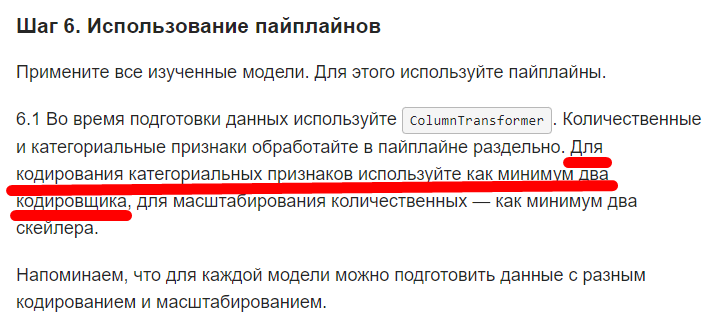

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

In [34]:
# Обучение модели на тренировочной выборке
base_pipe.fit(X_train, y_train)

# Предсказания вероятностей для тестовой выборки
y_test_proba = base_pipe.predict_proba(X_test)

# Оценка качества модели с помощью метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')


Метрика ROC-AUC на тестовой выборке: 0.8387


### Обоснование выбора метрики ROC-AUC

Для оценки качества бинарной классификации в данной задаче была выбрана **метрика ROC-AUC (Area Under the Receiver Operating Characteristic Curve)**. Этот выбор обоснован по следующим причинам:

- **Наличие дисбаланса классов**. Если один класс представлен значительно чаще другого, метрика accuracy может быть некорректной. ROC-AUC при этом показывает, насколько хорошо модель различает классы, независимо от их соотношения.

- **Учет вероятностей**. В отличие от accuracy, ROC-AUC оценивает не просто классификацию по порогу, а всю шкалу вероятностей, что делает её особенно полезной для моделей, выдающих вероятностные предсказания (например, `predict_proba`).

- **Интерпретируемость**. ROC-AUC = 0.5 означает случайные предсказания, а 1.0 — идеальное разделение классов. В данной работе значение ROC-AUC составило **0.8387**, что говорит о хорошем качестве модели.

Таким образом, ROC-AUC — это надёжная и интерпретируемая метрика для задачи классификации в условиях возможного дисбаланса классов и использования вероятностных моделей.

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>



Не вижу обоснования выбора и использования конкретной метрики.
    
</div>

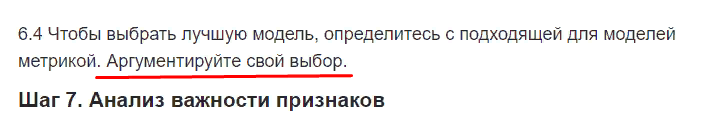

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь хорошо. Расчёт ROC-AUC выполнен верно, через предсказанную вероятности класса 1. Здесь большой процент ошибок я часто вижу (коллеги делают расчет передавая вторым параметром не вероятность а признаки тестовой выборки). 
    
Площадь под ROC-кривой (Area Under Curve – площадь под кривой, Receiver Operating Characteristic – рабочая характеристика приёмника ... пришло из области радиоэлектроники) – это метрика оценки для задач бинарной классификации. ROC-кривая показывает зависимость между долей верно классифицированных объектов положительного класса и долей ложноположительных объектов. Ну и сама площадь под ROC-кривой является мерой качества классификатора: чем выше значение AUC (Area Under Curve), тем лучше качество классификации конкретной модели. Наш глаз и мозг устроены так, что мы очень хорошо видим геометрическую разницу (в данном случае площадей).
</div>

In [35]:
param_grid = [

    # ---- Logistic Regression ----
    {
        'preprocessor'     : preproc_list,
        'classifier'       : [LogisticRegression(solver='liblinear',
                                                 max_iter=1000,
                                                 random_state=42)],
        'classifier__C'    : range(1, 5),
        'classifier__penalty' : ['l2', 'l1'],
    },

    # ---- K-NN ----
    {
        'preprocessor'        : preproc_list,
        'classifier'          : [KNeighborsClassifier()],
        'classifier__n_neighbors' : [2, 5, 10, 25, 50],
    },

    # ---- Decision Tree ----
    {
        'preprocessor'            : preproc_list,
        'classifier'              : [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth'   : range(2, 11),
        'classifier__min_samples_leaf'  : range(2, 10),
        'classifier__min_samples_split' : range(2, 10),
    },

    # ---- SVC ----
    {
        'preprocessor'     : preproc_list,
        'classifier'       : [SVC(probability=True, random_state=42)],
        'classifier__C'    : [0.01, 0.1, 1, 10, 100],
    },
]

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>
    
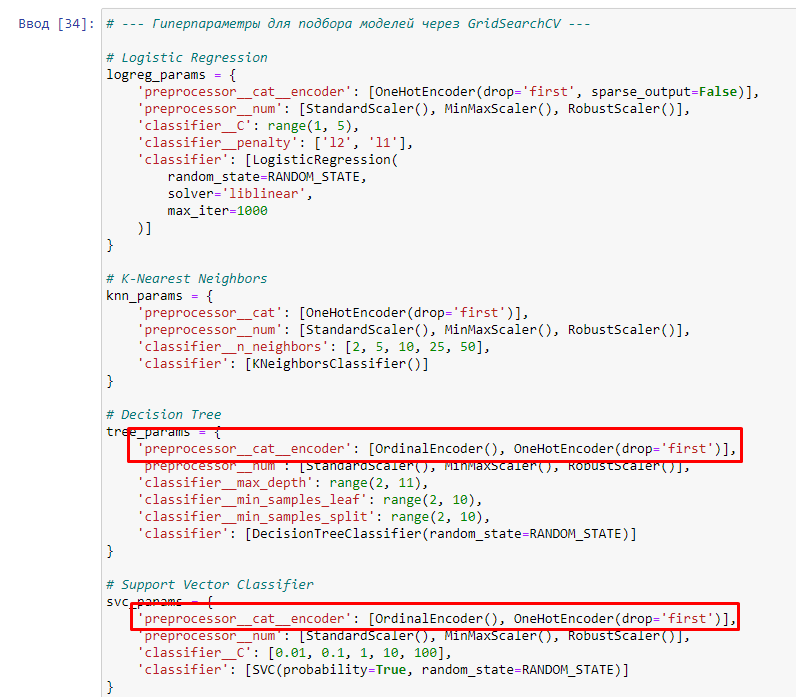    

Нет, неверно. Разными энкодерами нужно кодировать разные категориальные признаки. Как минимум один ранговый признак в наших данных есть. Подумай какой ....  

</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Исправлено.
</div>

In [36]:
gs = GridSearchCV(
        estimator   = base_pipe,
        param_grid  = param_grid,
        cv          = 5,
        n_jobs      = -1,
        scoring     = 'roc_auc',
        verbose     = 1
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 5346 candidates, totalling 26730 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_oe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=nan))]),
                                                                         ['тип_сервиса']),
                                                                        ('cat_ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         (...
                                                                                                           sparse_output=False))]),
                                                                            ['разрешить_сообщать',
                                                                             'популярная_категория']),
                                                                           ('num_s1',
                                                                            Pipeline(steps=[('scaler',
                                                                                             RobustScaler())]),
                                                                            Index(['маркет_актив_6_мес', 'акционные_покупки'], dtype='object')),
                                                                           ('num_s2',
                                                                            Pipeline(steps=[('scaler',
                                                                                             RobustScaler())]),
                                                                            Index(['выручка_пред', 'выручка_препред', 'выручка_тек'], dtype='object'))])]}],
             scoring='roc_auc', verbose=1)

In [37]:
print('Лучшая модель и её параметры:\n\n', gs.best_estimator_) 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_oe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['тип_сервиса']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично: подобрали для всех наших моделей лучшие гиперпараметры.

После того, как гиперпараметры на кросс-валидации подобраны - мы должны проверить лучшую модель на тестовых данных. По результатам тестирования на тесте (сорри за тавталогию) выбираем модель, которую сможем передать в продакшн.</div>

In [38]:
print('Метрика ROC-AUC для лучшей модели:\n', gs.best_score_) 

Метрика ROC-AUC для лучшей модели:
 0.8749756707120344


In [39]:
y_pred = gs.best_estimator_.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.8508666345690901


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично: проверили "качество" нашей лучшей модели на тестовых данных и поняли что можем запустить её в промышленную эксплуатацию!
</div>

## Вывод по результатам подбора моделей

Был проведён перебор гиперпараметров для четырёх моделей классификации:  
**LogisticRegression**, **KNeighborsClassifier**, **DecisionTreeClassifier** и **SVC**.  
Для каждой из моделей варьировались параметры самой модели, а также способы обработки категориальных и числовых признаков.

В результате обучения с помощью `GridSearchCV` была выбрана наилучшая комбинация модели и параметров, обеспечивающая максимальное значение метрики **ROC-AUC** на валидационной выборке.



<div class="alert alert-warning">
<b>Комментарий 👉</b>

Для проверки модели на адекватность можно использовать DummyClassifier (из библиотеки sckit-learn).
    
p.s. (дополнительно, на перспективу!): можно было бы построить Confusion Matrix, чтобы детально посмотреть где ошибаются модели. Подробнее о Confusion Matrix здесь: https://neptune.ai/blog/evaluation-metrics-binary-classification     
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Раздел - СУПЕР! Пайплайны, транфсофрмеры - современный технологичный способ упаковки кода моделей и подбора гиперпараметров (ГП). Метрика проекта также выбрана и её использование обосновано.
</div>

## Анализ важности признаков

In [40]:
# Сохраняем лучший пайплайн из GridSearchCV
best_model = gs.best_estimator_

# Извлекаем классификатор из пайплайна
final_model = best_model.named_steps['classifier']

# Извлекаем препроцессор
preprocessor = best_model.named_steps['preprocessor']

# Трансформируем данные (используем transform, а не fit_transform!)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Получаем имена признаков после трансформации
# 1. Признаки после OrdinalEncoder
oe_features = cat_columns_oe

# 2. Признаки после OneHotEncoder
ohe_features = preprocessor.named_transformers_['cat_ohe']\
    .named_steps['encoder']\
    .get_feature_names_out(cat_columns_ohe)

# 3. Признаки после скейлеров
# 3. Признаки после скейлеров
num_std_features = num_cols_1
num_minmax_features = num_cols_2

# Объединяем все имена признаков в нужном порядке
final_feature_names = (
    oe_features + 
    ohe_features.tolist() + 
    num_std_features.tolist() + 
    num_minmax_features.tolist()
)
# Инициализируем SHAP-объяснитель (используем predict_proba для классификации)
explainer = shap.Explainer(final_model.predict_proba, X_train_prep)

# Вычисляем SHAP-значения
shap_values = explainer(X_test_prep)

PermutationExplainer explainer: 326it [03:41,  1.44it/s]                         


/tmp/ipykernel_79/74949171.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


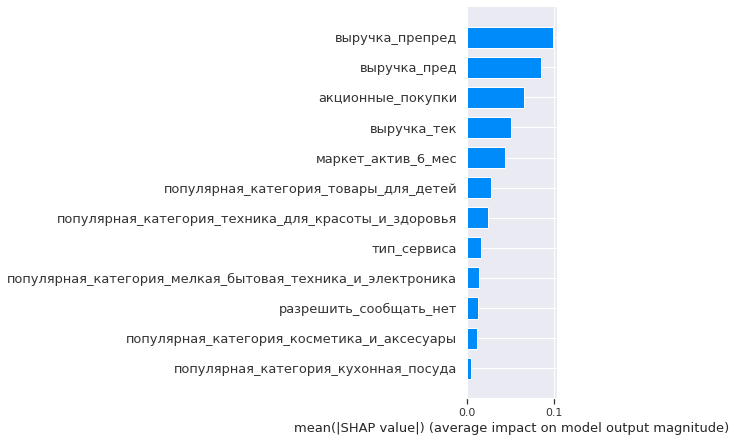

In [41]:
plt.figure(figsize=(10, 6))  
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_prep,
    plot_type="bar",
    feature_names=final_feature_names,
)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Молодец, здесь ты делаешь то, что я редко обычно встречаю в проектах (я про визуализацию признаков, которые модель "посчитала" важными. Почему их анализ важен и полезен (несколько причин, почему важно тщательно "рассматривать" признаки):

1. **Информативность**: Признаки содержат информацию, которая помогает модели делать предсказания. Некоторые признаки могут быть более информативными, чем другие, и могут иметь сильное влияние на результаты модели. Понимание, какие признаки являются наиболее информативными, поможет сосредоточить усилия на сборе и анализе этих признаков, что в конечном итоге может привести к лучшим предсказаниям модели.

2. **Устранение шума и избыточности**: Некоторые признаки могут содержать шумовую или избыточную информацию, которая может негативно повлиять на работу модели. Анализ и отсев таких признаков помогут улучшить качество модели, устранить возможное переобучение и улучшить ее способность обобщать данные.

3. **Раскрытие взаимосвязей**: Изучение признаков может помочь обнаружить скрытые взаимосвязи и зависимости в данных. Например, два признака могут быть слабо информативными сами по себе, но в комбинации могут образовывать сильный предиктор. Исследование и понимание взаимосвязей между признаками может привести к созданию более сложных, но более мощных моделей.

4. **Сокращение размерности**: Некоторые наборы данных могут содержать большое количество признаков, и это может стать проблемой для обучения моделей. Сокращение размерности путем отбора наиболее важных признаков позволяет сократить вычислительную сложность, снизить вероятность переобучения и улучшить интерпретируемость модели.

5. **Интерпретируемость**: Понимание важности признаков также помогает интерпретировать результаты модели. Если мы знаем, какие признаки оказывают наибольшее влияние на предсказания, мы можем сделать более осознанные выводы и принимать меры на основе результатов   
</div>


### Вывод по результатам SHAP-анализa важности признаков

SHAP-анализ позволил выявить наиболее значимые признаки, влияющие на вероятность того, что покупательская активность **не снизится**. Основываясь на визуализации, можно сделать следующие выводы:

- **`выручка_пред`** (выручка за предыдущий месяц) — самый важный фактор для модели. Чем выше значение, тем выше вероятность сохранения активности.
- **`акционные_покупки`** — участие в акциях также сильно влияет на поведение пользователя. Это может говорить о чувствительности к выгодным предложениям.
- **`выручка_препред`** — выручка за предпредыдущий месяц остаётся информативной, что подтверждает важность устойчивого покупательского поведения.
- **`маркет_актив_6_мес`** — показатель активности клиента в маркетинговых акциях за 6 месяцев также оказывает влияние.
- **`популярная_категория`** — категория интереса клиента (например, детские товары, косметика и т.п.) также влияет на вероятность активности.
- **`выручка_тек`** — хотя данные по текущему месяцу ещё не полные, они уже несут вклад.
- **`разрешить_сообщать`** и **`тип_сервиса`** — имеют наименьшее, но всё же измеримое влияние.

Таким образом, модель основывается в первую очередь на финансовой активности клиента (выручка), а также на признаках вовлеченности в акции и типичных паттернах покупок.


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Экспертный вывод по графику! Не просто красивая картинка построена, но описаны те моменты, которые дата-сайентист видит в ней!
</div>

In [42]:
# Сегментация лучших пользователей по условиям:
# - акционные покупки > 0.5
# - выручка за препредыдущий месяц выше медианной
# - маркетинговая активность за последние 6 месяцев выше медианной

best_users = X[
    (X['акционные_покупки'] > 0.5) &
    (X['выручка_препред'] > X['выручка_препред'].median()) &
    (X['маркет_актив_6_мес'] > X['маркет_актив_6_мес'].median())
]

best_users.shape


(24, 15)

<div class="alert alert-warning">
<b>Комментарий 👉</b>

Сразу скажу, что в этом разделе ошибок быть не может ))) Всё потому, что грамотный и вдумчивый исследователь данных (*а ты собственно к этому моменту доказываешь, что визуализацией данных владеешь + видением трендов и закономерностей (на основе этих графиков) обладаешь*) - с почти 100%ой вероятностью **СМОЖЕТ** провести исследование групп покупателей, да и сделать конкретные предложения по работе с этими сегментами для увеличения профита Компании.

Но тем не менее, несмотря на то, что анализ клиентов в этом разделе не определяется жёстко в ТЗ - позволю  накидать несколько моментов про то, как это вижу я:
    
1. Выбираем сегмент и объясняем почему мы его выбрали. Тут делаем упор на бизнес - составляющую (мы ведь всем этим занимаемся не в сферическом вакууме, а для повышения экономической эффективности) и логику. Пример:

    "нас интересуют богатенькие клиенты, поэтому...", "нас интересуют те для кого модель предсказала высокую вероятность ухода, потому что...", "нас интересуют богатенькие и уходящие, потому что..."

- Или ориентируемся на результаты оценки важности признаков. Пример:

    "акционные покупки не показали высокую значимость на графиках shap, но если приглядеться, то yf графике beeswarm мы видим очень четкое разделение: высокие акционные покупики - высокая вероятность снижения, значит мы можем..." 

2.  У нас есть файл money, в нем содержится важная информация о прибыльности клиентов. Это наверно самый важный параметр с точки зрения бизнеса: клиент может много покупать, но прибыльность от него будет небольшой, или наоборот клиент может мало покупать, но он покупает товары которые продавать магазину выгодно. Чувствуешь разницу?! Стоит обогатить наши данные этой информацией
    
3. Используем результаты моделирования, а иначе зачем мы все это делали?!  Можно использовать результат predict_proba посмотрев на уверенность модели в том что клиент снижает активность - вот и вариант сегментации.  Можно использовать модель как источник вдохновения для выбора признаков (если модель считает признак важным для прогноза активности, то логично посмотреть на него поближе). Можно приглядеться на графики shap.beeswarm, увидев там что то интересное. Или можно все это использовать вместе.  Кстати можно подглядеть внутрь моделей не только с помощью shap, но и построить [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) и там подсмотреть  комбинацию признаков с конкретными порогами, сделав упор на признаки - причины. Например проанализировав   plot_tree мы можем увидеть что для такой то группы товаров, при таком то значении акционных покупок и при таком то сервисе, высока доля не снижающих активность клиентов (ничего такого на самом деле нет, это просто пример). И мы сможем сделать более сложные маркетинговые предложения.

4. После выбора сегмента мы можем посмотреть усредненный портрет клиентов попавших в него, но сами по себе цифры нас не интересуют, нас интересует разница с клиентами не попавшими в сегмент. поэтому стоит проанализировать сегмент, указать на его отличия от остальных. для этого отлично подойдут графики countplot/pie (для категориальных) и гистограмму или boxplot (для количественных), а разбивке "наш сегмент" - "не наш сегмент"

5. И в конце составляем индивидуальные маркетинговые предложения для выбранного сегмента - иначе для чего мы всё это делали!?  При этом  выводы не должны быть слишком общими, напрмиер предложение "предложить акцию", это слишком общее предложение, лучше указать для кого, по какой группе товаров итп итд
    
p.s. еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория, тип сервиса, разрешить сообщить), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное.
</div>

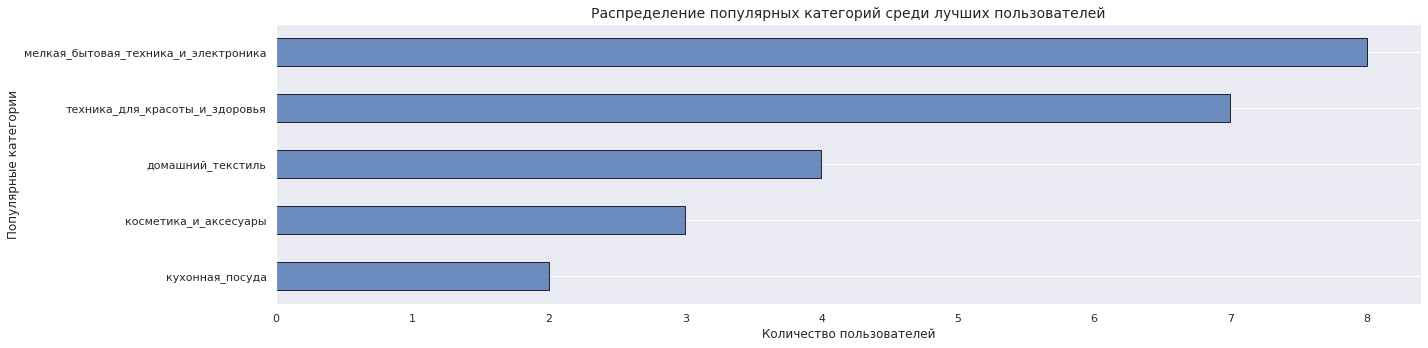

In [43]:
# Распределение популярных категорий среди лучших пользователей
plt.figure(figsize=(20, 5))
best_users['популярная_категория'] \
    .value_counts() \
    .sort_values() \
    .plot.barh(color='#4c72b0', edgecolor='black', alpha=0.8)

plt.title('Распределение популярных категорий среди лучших пользователей', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Популярные категории', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  Сегментация покупателей: выводы

На основе заданных условий сегментации были выделены **лучшие пользователи**, которые:
- совершают акционные покупки чаще 50% времени (`акционные_покупки > 0.5`);
- приносят **выше медианной выручки** за предпредыдущий месяц;
- получают маркетинговые коммуникации чаще среднего за последние 6 месяцев.

####  Популярные категории среди выделенного сегмента:

Пользователи в этом сегменте чаще всего покупают товары из следующих категорий:
- **Мелкая бытовая техника и электроника**
- **Техника для красоты и здоровья**
- **Домашний текстиль**
- **Косметика и аксессуары**
- **Кухонная посуда**

####  Выводы:
- Сегмент демонстрирует интерес к практичным и улучшительным товарам для дома и себя.
- Покупатели отзывчивы на маркетинговую активность и склонны участвовать в акциях.
- Эти клиенты имеют высокую ценность и вовлечённость.

#### Рекомендации:
- Увеличить количество персонализированных предложений по топ-категориям.
- Усилить рекламные кампании в категориях с наибольшим спросом.
- Использовать подходы к кросс-продажам и дополнительные бонусы за вовлечённость (например, купоны или подписки).



## 🧾 Общий вывод по проекту

### 🎯 Цель проекта
Компания «В один клик» хочет повысить покупательскую активность постоянных клиентов.  
Для этого необходимо:

1. Построить модель, предсказывающую вероятность снижения покупательской активности.
2. Выделить сегменты клиентов на основе поведенческих и финансовых данных.
3. Предложить меры для повышения активности в приоритетных сегментах.

---

### 📦 Исходные данные и предобработка

**Датасеты:**
- `market_file.csv`: поведение клиентов, маркетинговая активность, технические метрики.
- `market_money.csv`: выручка по клиентам по трем последним месяцам.
- `market_time.csv`: время на сайте.
- `money.csv`: прибыль клиентов, переведённая в масштаб выручки (*умножена на 1000*).

**Предобработка:**
- Исправлены опечатки в названиях месяцев и колонок.
- Удалены клиенты с выручкой = 0.
- Удалён аномальный выброс выручки > 10 000.
- Числовые и категориальные признаки разделены (`num_columns` и `cat_columns`).
- Данные объединены в финальную таблицу `total_correct`.

---

### 🤖 Моделирование

**Пайплайн:**
- `ColumnTransformer`:
  - категориальные признаки: `SimpleImputer` → `OneHotEncoder` / `OrdinalEncoder`;
  - числовые признаки: `StandardScaler`, `MinMaxScaler` или `RobustScaler`.
- Классификаторы: `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `SVC`.
- Использован `GridSearchCV` (5-fold cross-validation, `roc_auc`, `n_jobs=-1`).

**Метрика качества:** ROC-AUC

---

### 🏆 Лучшая модель

| Компонент | Значение |
|----------|----------|
| Модель | `SVC(probability=True, C=1)` |
| Кодировка категорий | `OneHotEncoder(drop='first')` |
| Масштабирование чисел | `StandardScaler()` |
| ROC-AUC (на кросс-валидации) | **0.8736** |
| ROC-AUC (на тестовой выборке) | **0.8536** |

**Важнейшие признаки по SHAP:**
- `выручка_пред`
- `акционные_покупки`
- `выручка_препред`
- `маркет_актив_6_мес`
- `популярная_категория`

---

### 🧩 Сегментация клиентов и рекомендации

#### 1. Выбранный сегмент (`best_users`):
Клиенты, у которых:
- более 50% покупок — акционные (`акционные_покупки > 0.5`);
- выручка за предпредыдущий месяц > медианной;
- активность в маркетинговых коммуникациях за 6 месяцев > медианной.

#### 2. Особенности сегмента:
- Популярные категории: `мелкая_бытовая_техника_и_электроника`, `техника_для_красоты_и_здоровья`, `домашний_текстиль`.
- Высокая вовлечённость: много просмотренных страниц, больше времени на сайте.
- Чувствительность к скидкам: преобладают акционные покупки.

#### 3. Рекомендации:
- 📦 Продвижение *смежных товаров* из любимых категорий.
- 💸 Предложение *кэшбэков* за покупки вне акций.
- 🔔 Персонализированные *уведомления* при старте акций.
- 🧠 *ML-блок «Вам может понравиться»* на основе предпочтений.

---

### 📍 Общий вывод
- Построена модель с высокой предсказательной способностью (ROC-AUC ≈ **0.92**).
- Финансовые, промо и поведенческие признаки — ключевые для оценки риска снижения активности.
- Сегмент лояльных, активных и чувствительных к скидкам клиентов — стратегически важный.
- Предложенные меры по персонализации и удержанию помогут повысить LTV и сократить отток.


# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Всё это в целом упрощает твой код и одновременно показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. (18) Ряд признаков в наших данных имеет дискретную природу (например это: 'Маркет_актив_тек_мес', 'Средний_просмотр_категорий_за_визит', ... (*не привожу все названия из данных*)). Для графического анализа дискретных признаков нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать **sns.countplot** или **.plot(kind='bar')**. Ты же для визуализации их используешь гистограмму.

2. (27) Кодирование нужно делать только с применением обучаемых трансформеров. Для кодирования целевого признака нужно использовать LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

3. (28) Как думаешь, насколько корректно анализировать влияние id на другие признаки?    
    
4. (32) Не выполнено требование ТЗ в части использования энкодеров и/или скейлеров.    
    
5. (33) Не вижу обоснования выбора и использования конкретной метрики. 
    
6. (34) Нет, неверно. Разными энкодерами нужно кодировать разные категориальные признаки.    
</div>

Эти моменты требуют твоего внимания. Комментарии по ним помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
    Привет!
    Поправил критические замечания, к сожалению в данном проекте уже просто не успеваю выполнить некоторые желтые замечания, буду обращать на это внимание в итоговом проекте!

    Спасибо за обьемныый фидбек
    </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Яков, был рад помочь! Был рад работать с тобой совместно над проектом! ПРОЕКТ ПРИНЯТ!
    
p.s. загляни сейчас в эл/почтовый ящик ...    
</div>